# 💔 Heart Failure Prediction (M.L 🆚 D.L) :-
## Machine Learning 🆚 Deep Learning :

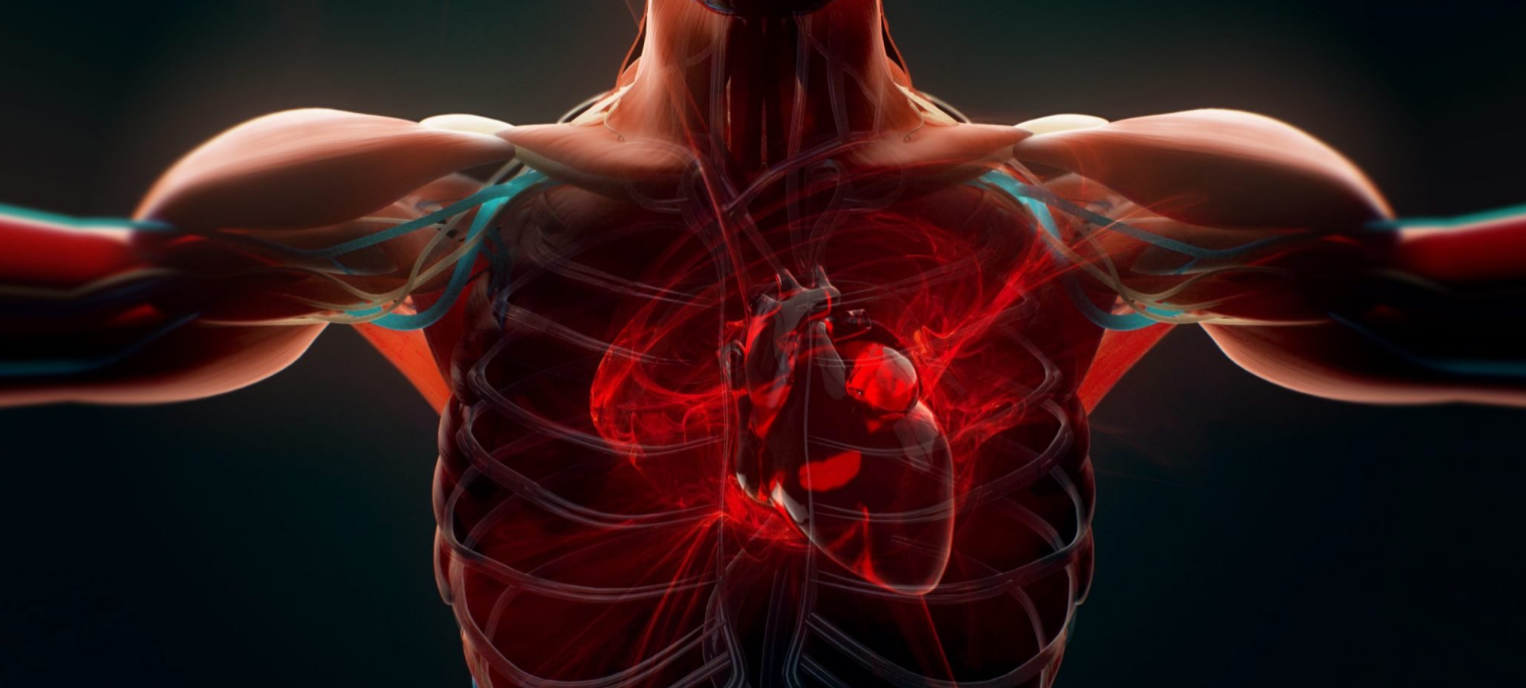

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Heart.png")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\heart_failure_clinical_records_dataset.csv")
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [4]:
df.shape

(299, 13)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Pairplot Of Data :

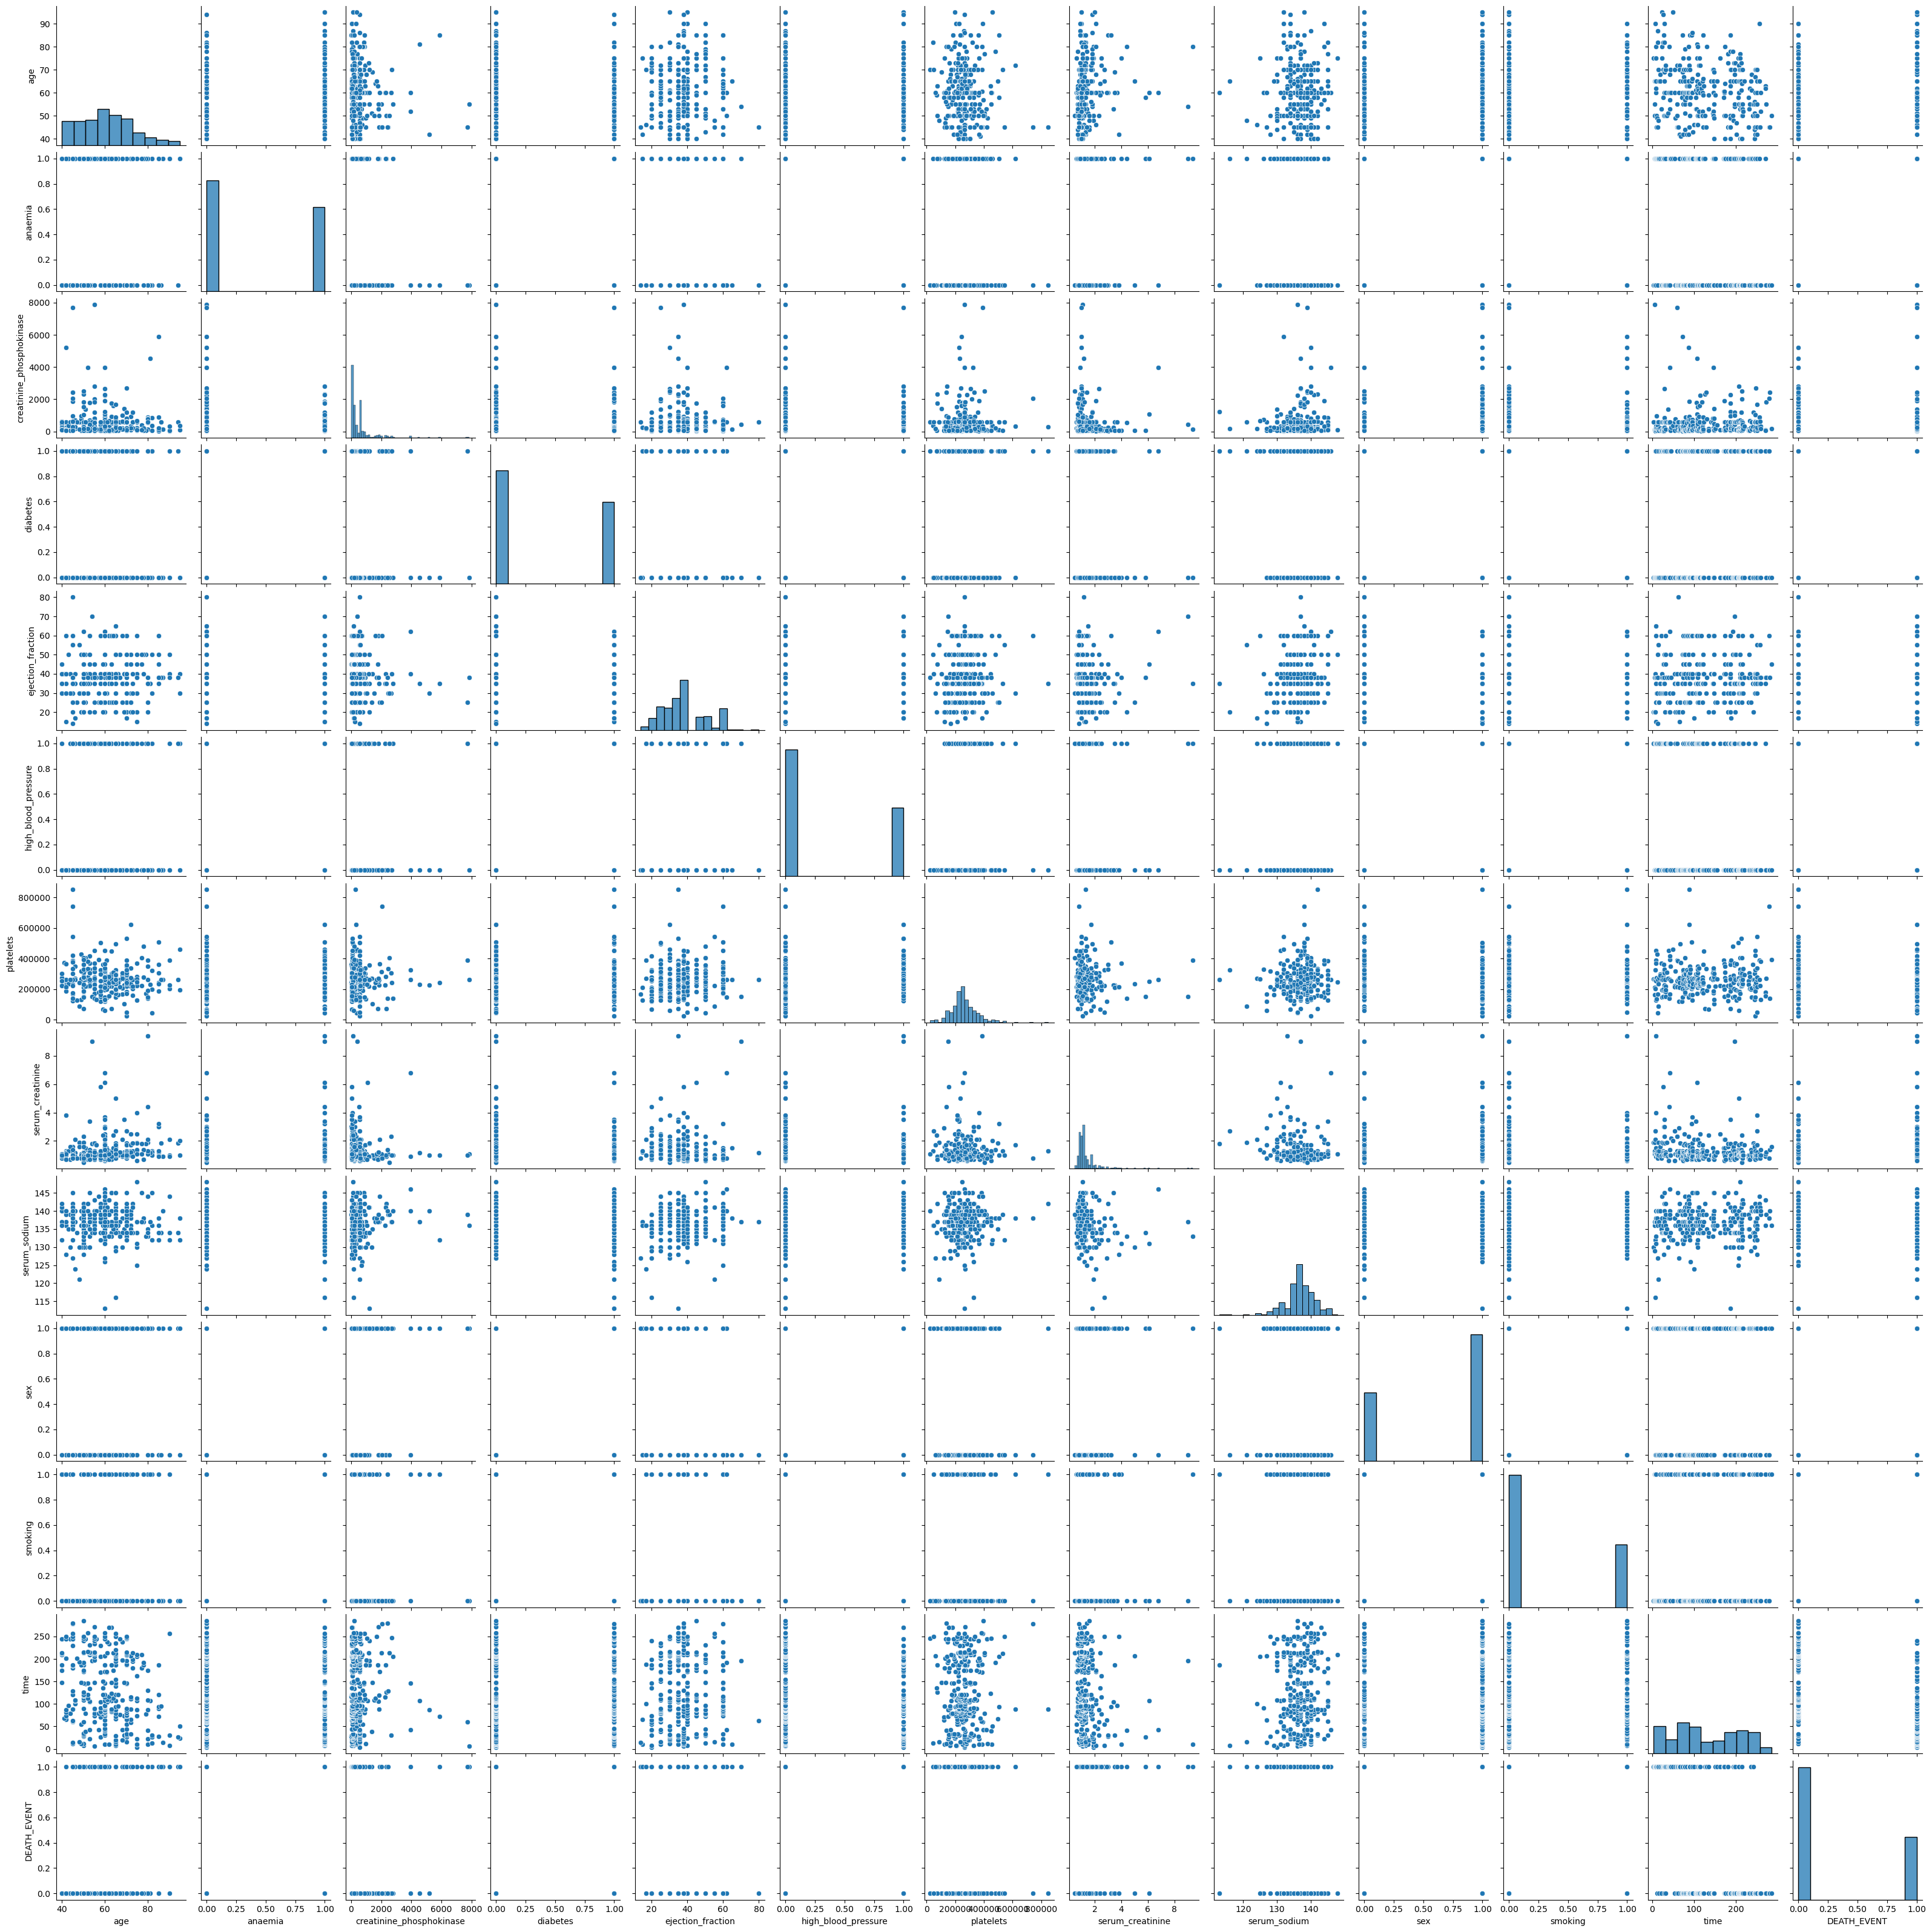

In [9]:
sns.pairplot(df)

# Distribution Of Data :

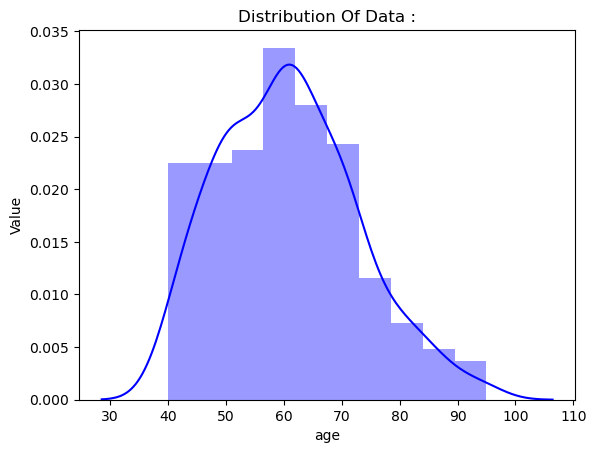

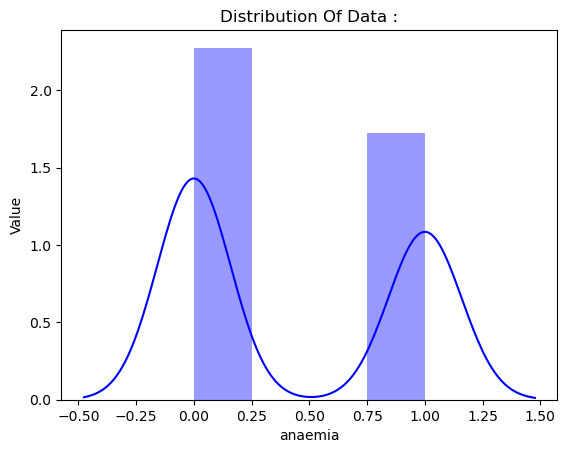

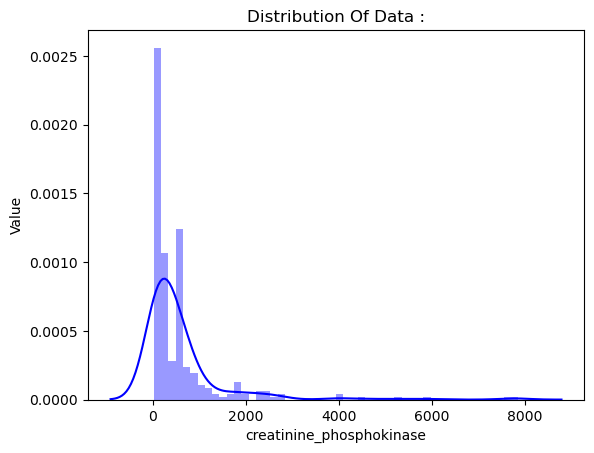

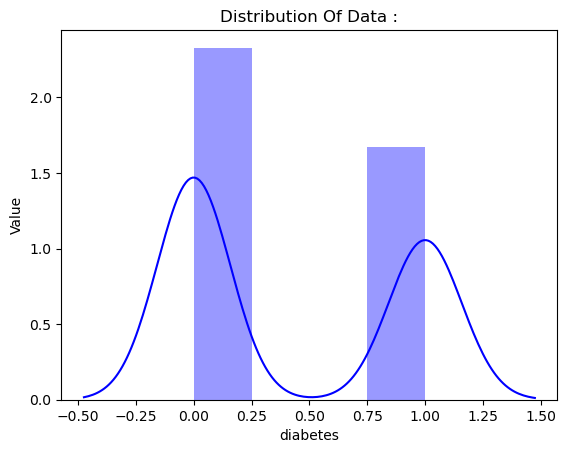

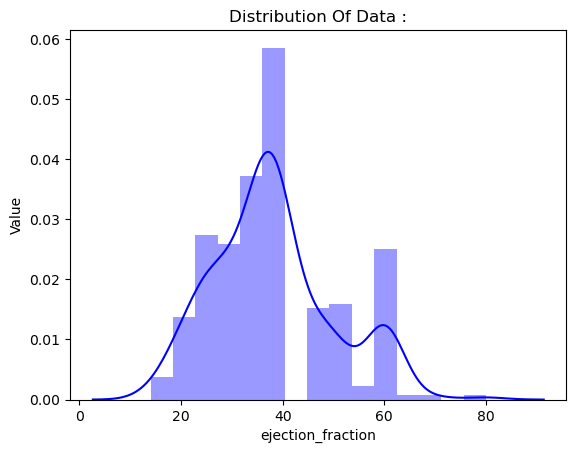

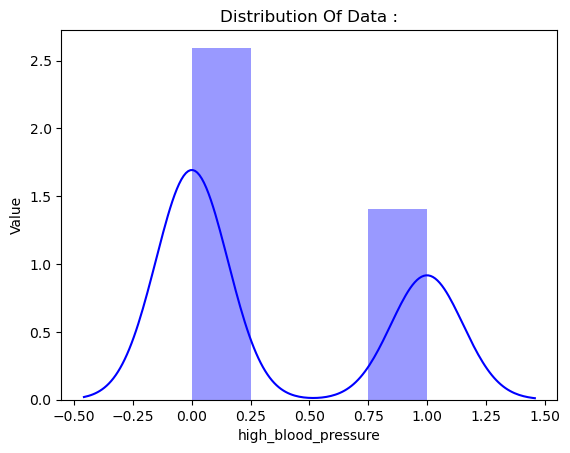

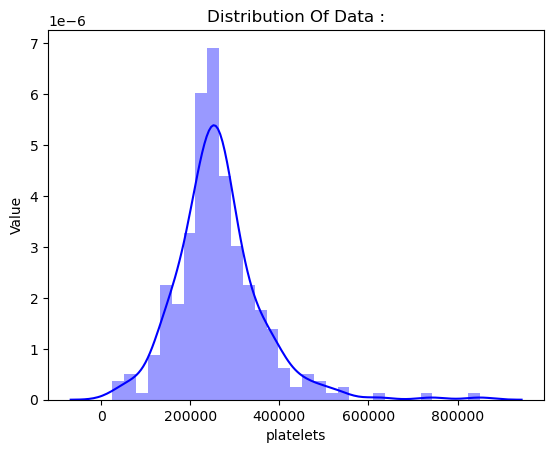

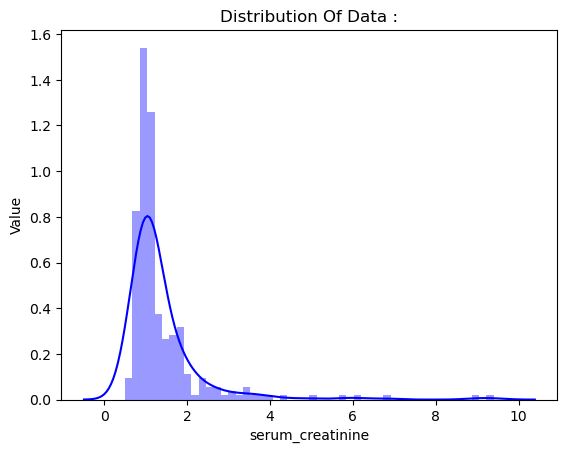

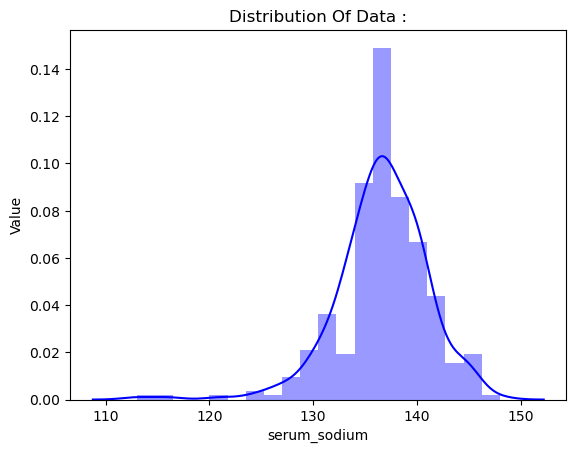

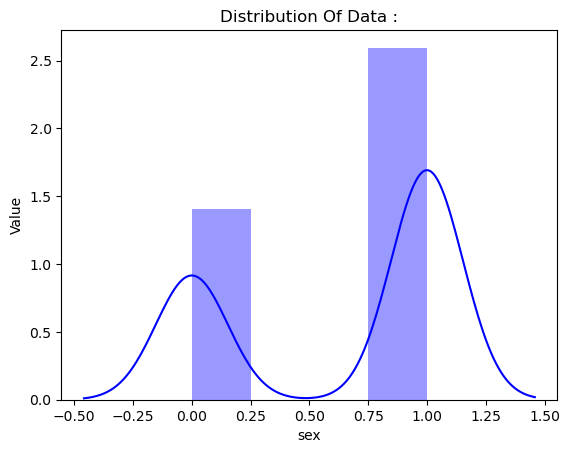

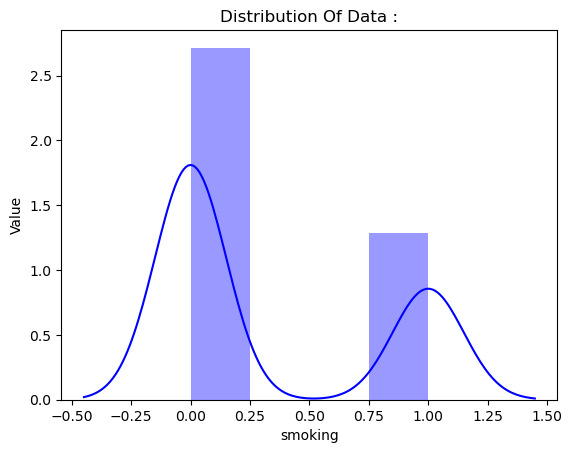

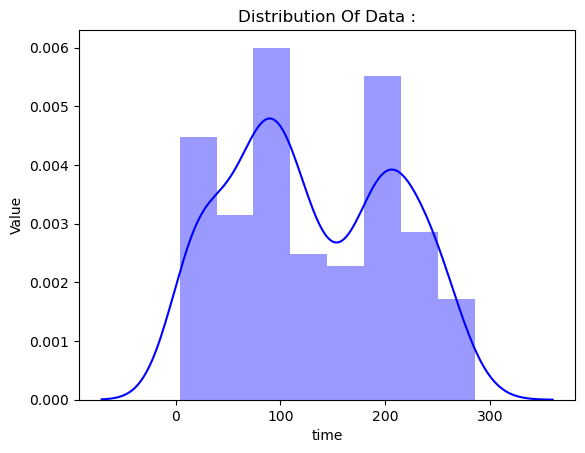

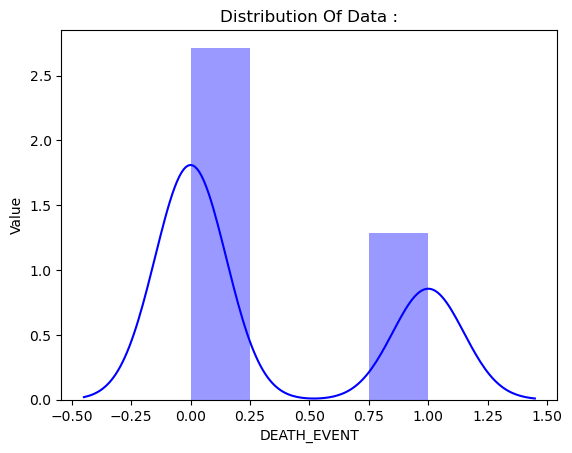

In [10]:
for i in df.columns:
    sns.distplot(df[i],color='blue')
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.title('Distribution Of Data :')
    plt.show()

In [11]:
df.rename(columns={'DEATH_EVENT':'Death'},inplace=True)

# Corelation Of All Veriable :

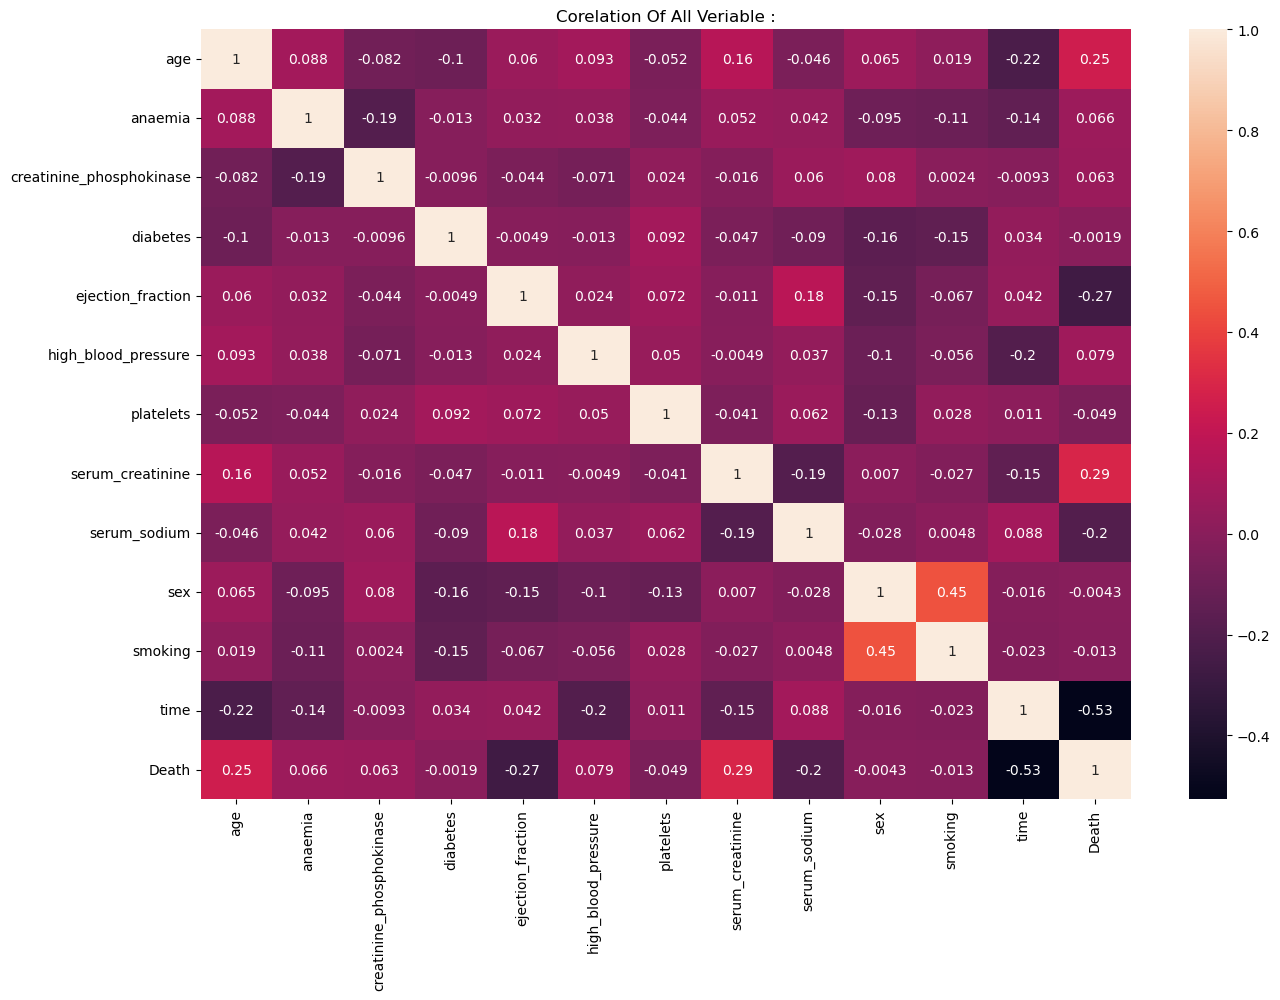

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Corelation Of All Veriable :')
plt.show()

# Variance_inflation_factor :

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=df.drop(['Death'],axis=1)
vif=pd.DataFrame({'Variable':v.columns})
vif['VIF']=[variance_inflation_factor(v.values,r)
            for r in range(len(v.columns))]
vif

Variable        VIF
0                        age  29.114744
1                    anaemia   1.909994
2   creatinine_phosphokinase   1.448473
3                   diabetes   1.789419
4          ejection_fraction  12.081364
5        high_blood_pressure   1.646044
6                  platelets   8.641813
7           serum_creatinine   2.919913
8               serum_sodium  59.151991
9                        sex   3.795155
10                   smoking   1.892753
11                      time   4.351441

# VIF Corelation :

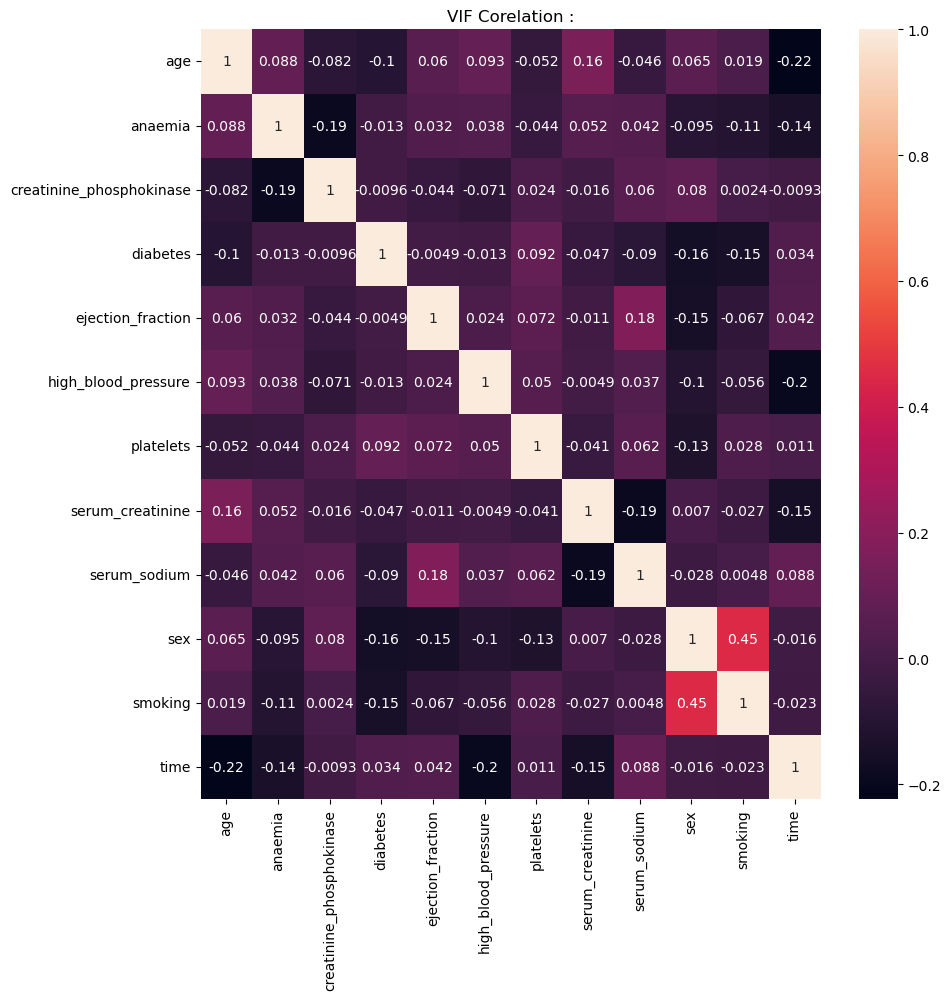

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap((df.iloc[:,:12]).corr(),annot=True)
plt.title('VIF Corelation :')
plt.show()

# Outliar Detection :

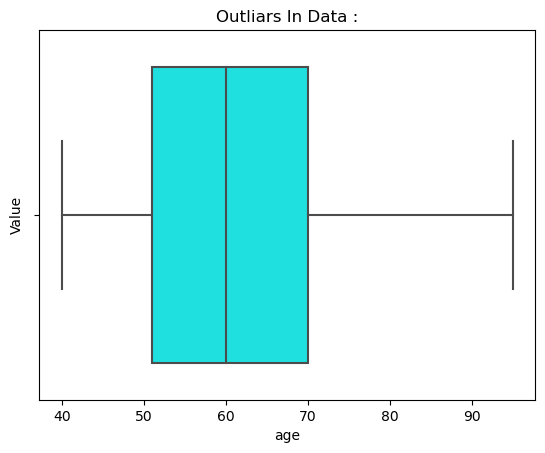

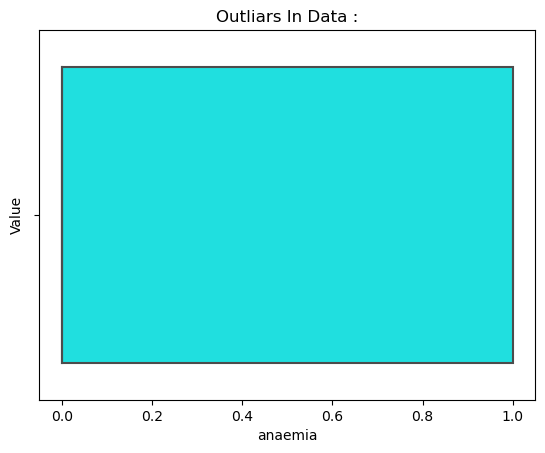

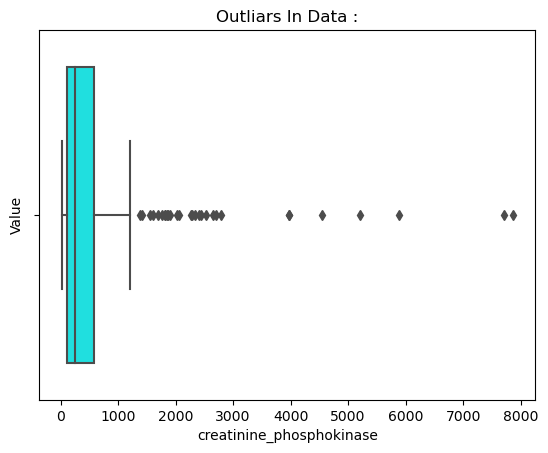

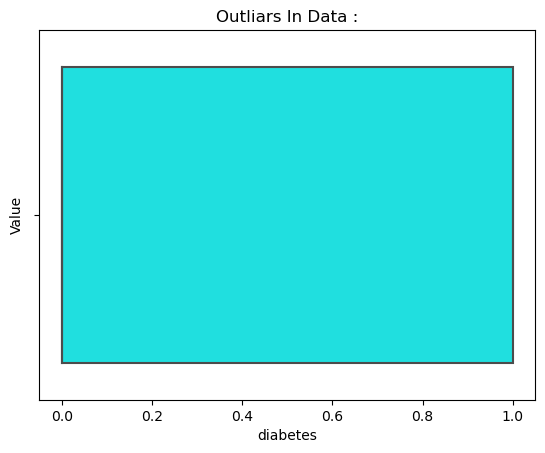

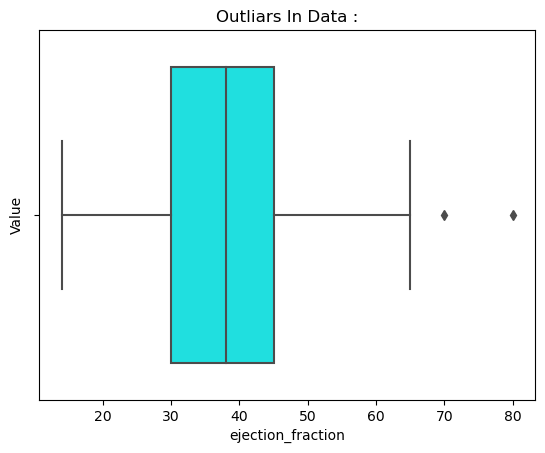

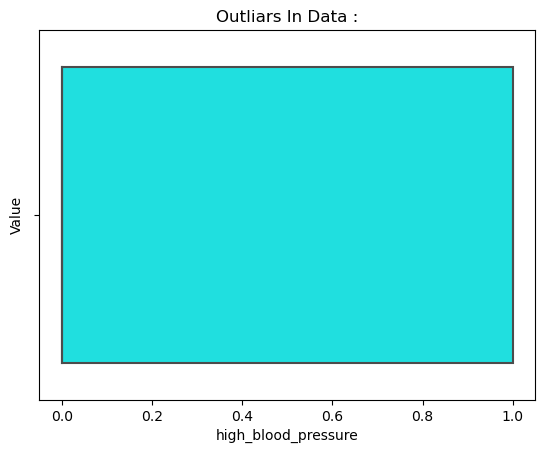

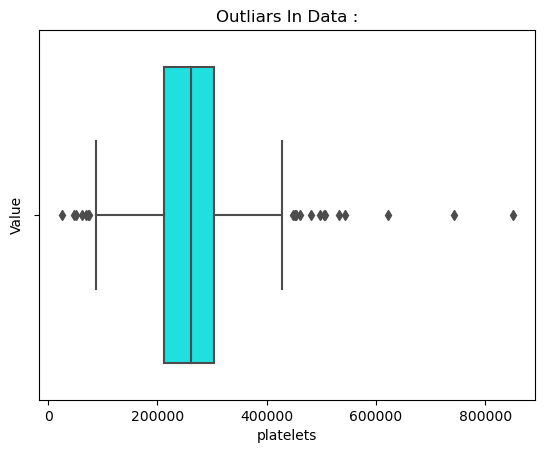

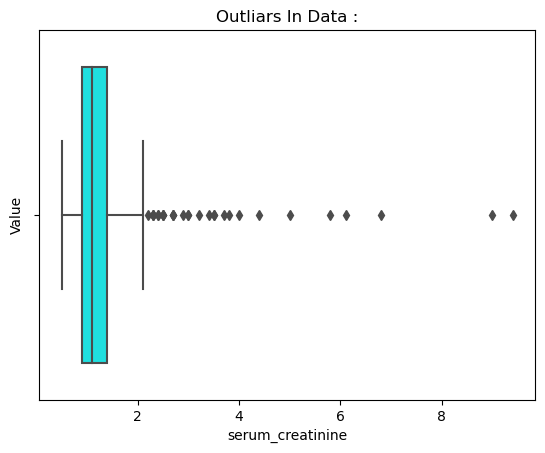

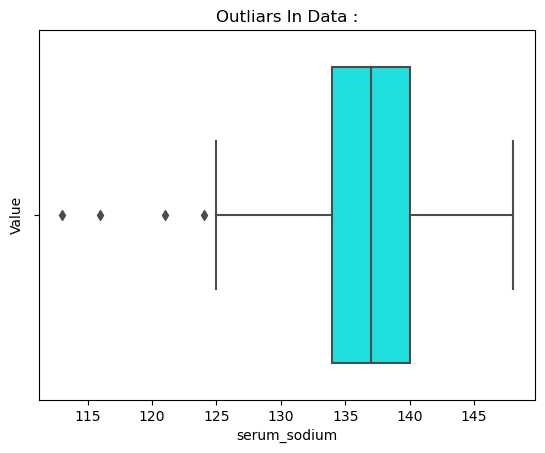

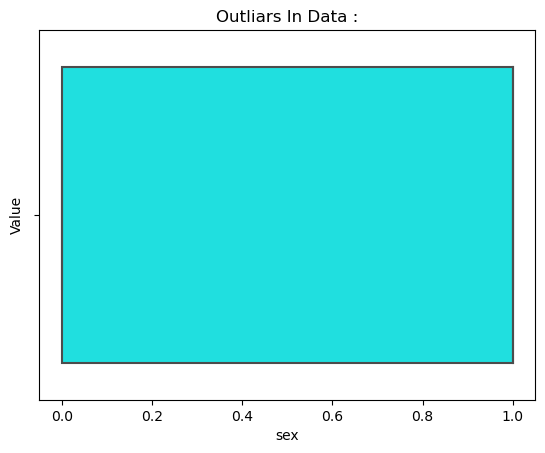

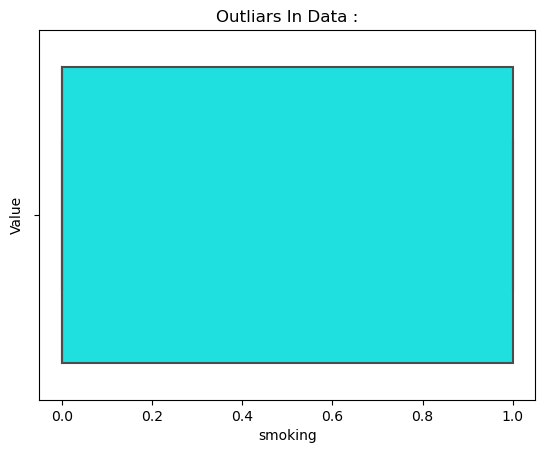

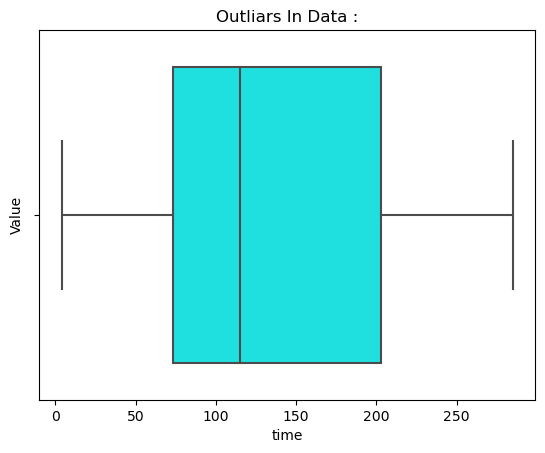

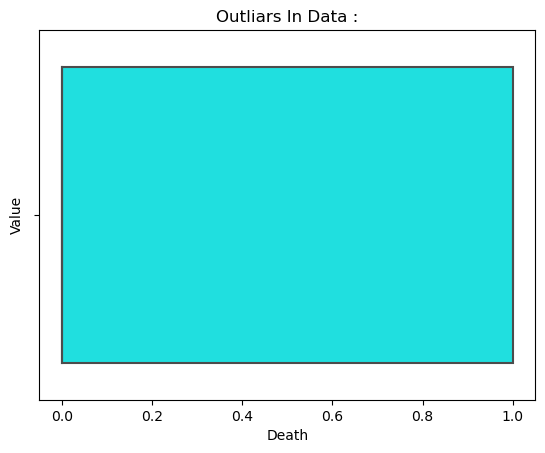

In [15]:
for o in df.columns:
    sns.boxplot(df[o],color='cyan')
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.title('Outliars In Data :')
    plt.show()

## Dealing With Outliars :

In [16]:
Q1=np.percentile(df['creatinine_phosphokinase'],25)
Q3=np.percentile(df['creatinine_phosphokinase'],75)
Iqr=Q3-Q1
L_Fence=Q1-(1.5*Iqr)
U_Fence=Q3+(1.5*Iqr)

In [17]:
Q11=np.percentile(df['ejection_fraction'],25)
Q31=np.percentile(df['ejection_fraction'],75)
Iqr1=Q31-Q11
L_Fence1=Q11-(1.5*Iqr1)
U_Fence1=Q31+(1.5*Iqr1)

In [18]:
Q12=np.percentile(df['platelets'],25)
Q32=np.percentile(df['platelets'],75)
Iqr2=Q32-Q12
L_Fence2=Q12-(1.5*Iqr2)
U_Fence2=Q32+(1.5*Iqr2)

In [19]:
Q13=np.percentile(df['serum_creatinine'],25)
Q33=np.percentile(df['serum_creatinine'],75)
Iqr3=Q33-Q13
L_Fence3=Q13-(1.5*Iqr3)
U_Fence3=Q33+(1.5*Iqr3)

In [20]:
Q14=np.percentile(df['serum_sodium'],25)
Q34=np.percentile(df['serum_sodium'],75)
Iqr4=Q34-Q14
L_Fence4=Q14-(1.5*Iqr4)
U_Fence4=Q34+(1.5*Iqr4)

## Outliars Removing :

In [21]:
A=df.loc[(df['creatinine_phosphokinase']>=L_Fence) & (df['creatinine_phosphokinase']<=U_Fence)]

In [22]:
B=A.loc[(A['ejection_fraction']>=L_Fence1) & (A['ejection_fraction']<=U_Fence1)]

In [23]:
C=B.loc[(B['platelets']>=L_Fence2) & (B['platelets']<=U_Fence2)]

In [24]:
D=C.loc[(C['serum_creatinine']>=L_Fence3) & (C['serum_creatinine']<=U_Fence3)]

In [25]:
Data=D.loc[(D['serum_sodium']>=L_Fence4) & (D['serum_sodium']<=U_Fence4)]

In [26]:
Data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
5    90.0        1                        47         0                 40   
6    75.0        1                       246         0                 15   
..    ...      ...                       ...       ...                ...   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1   265000.0               1.9           130    1   
2                      0   162000.0               1.3           129    1   
3                      0   210000.0               1.9           137    1   
5                      1   204000.0               2.1           132    1   
6                      0   127000.0               1.2           137    1   
..                   ...        ...               ...           ...  ...   
291                    0   133000.0               1.4           139    1   
292                    0   382000.0               1.0           140    1   
293                    0   179000.0               0.9           136    1   
294                    1   155000.0               1.1           143    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  Death  
0          0     4      1  
2          1     7      1  
3          0     7      1  
5          1     8      1  
6          0    10      1  
..       ...   ...    ...  
291        0   258      0  
292        1   258      0  
293        1   270      0  
294        1   270      0  
298        1   285      0  

[224 rows x 13 columns]

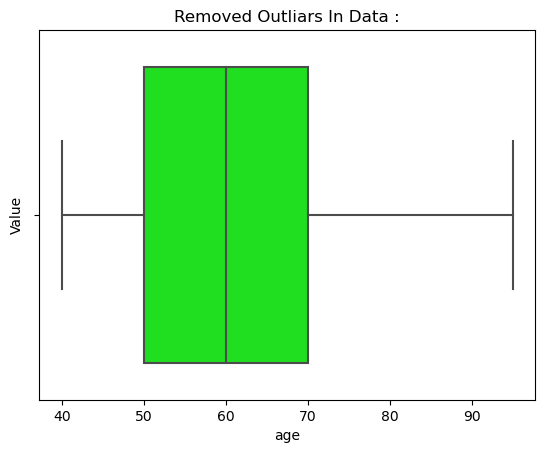

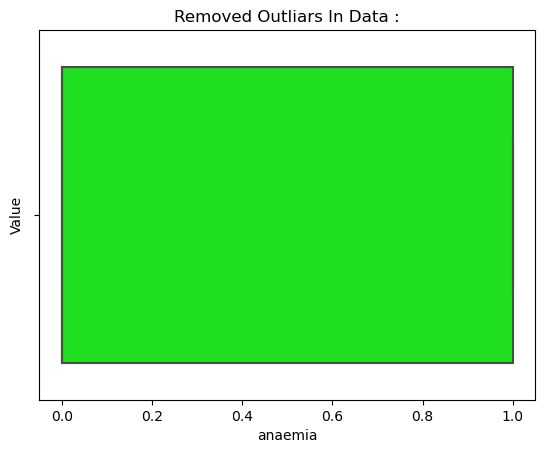

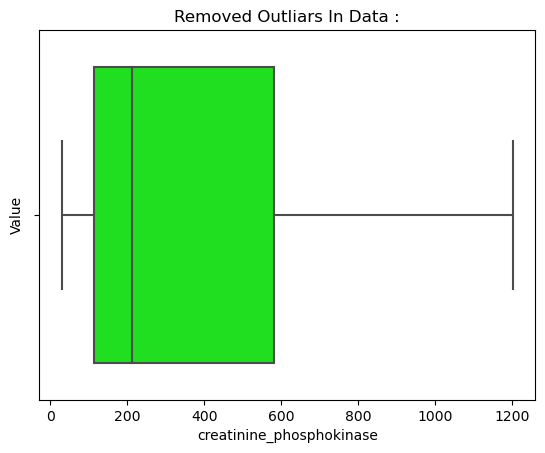

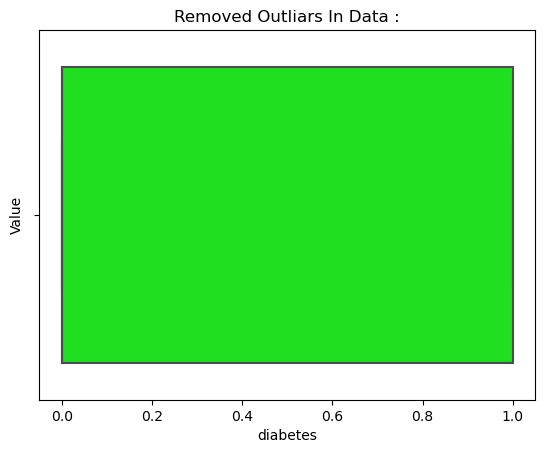

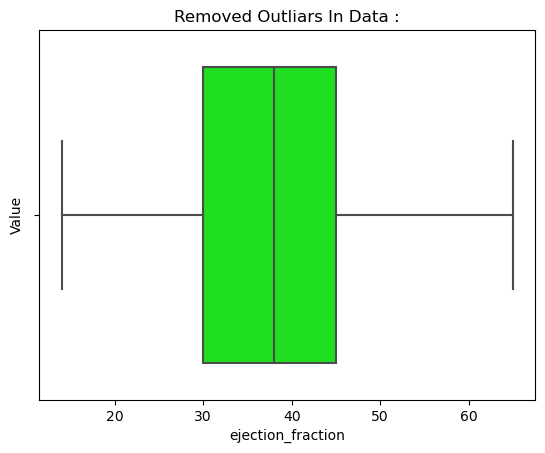

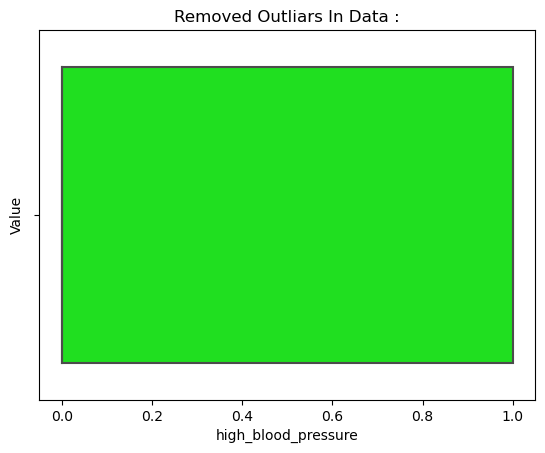

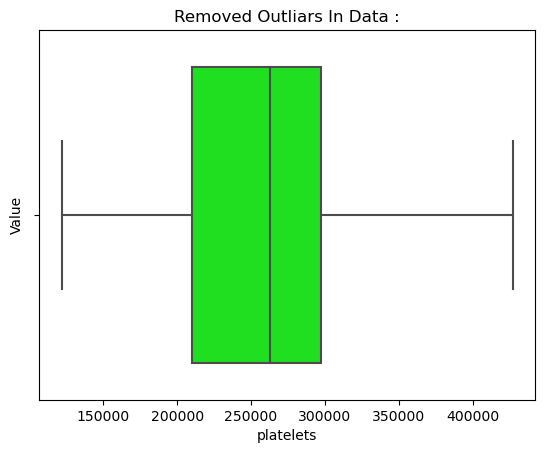

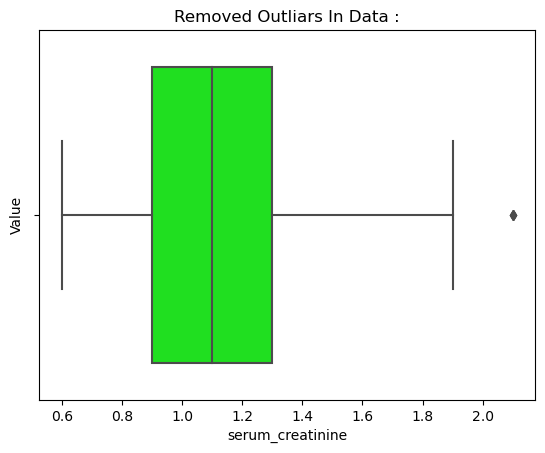

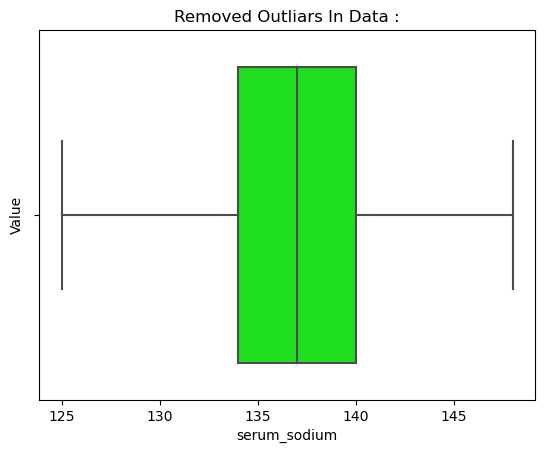

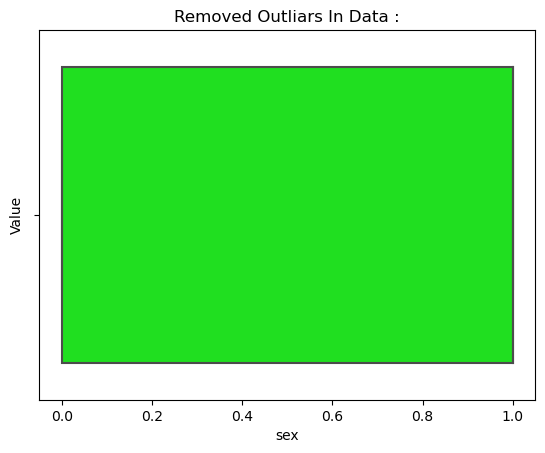

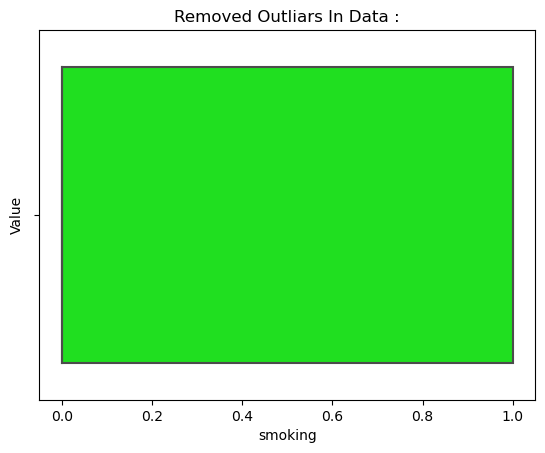

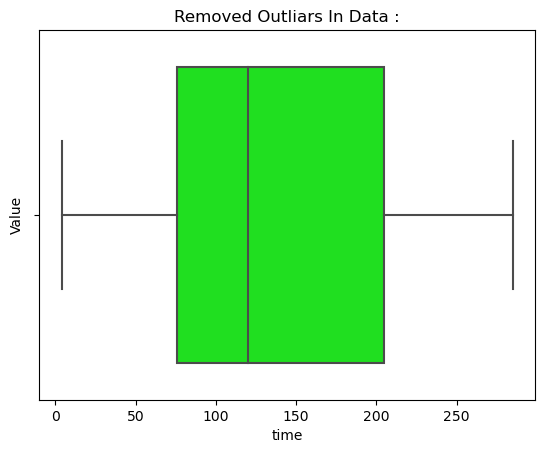

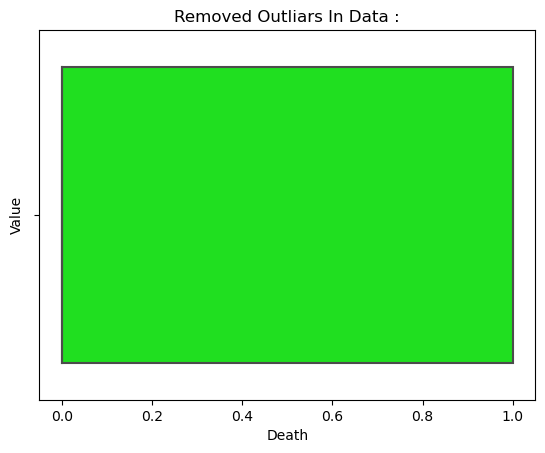

In [27]:
for z in Data.columns:
    sns.boxplot(Data[z],color='lime')
    plt.xlabel(z)
    plt.ylabel('Value')
    plt.title('Removed Outliars In Data :')
    plt.show()

In [28]:
Data.shape

(224, 13)

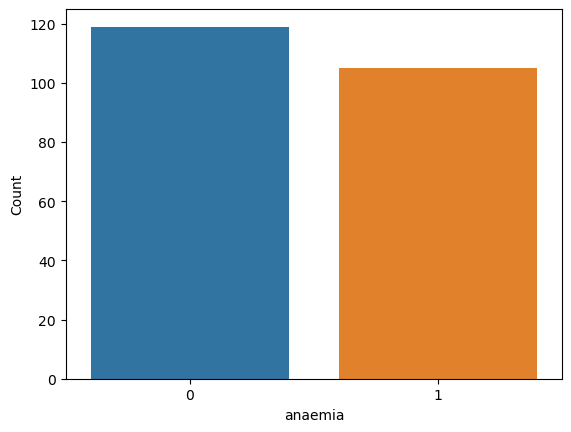

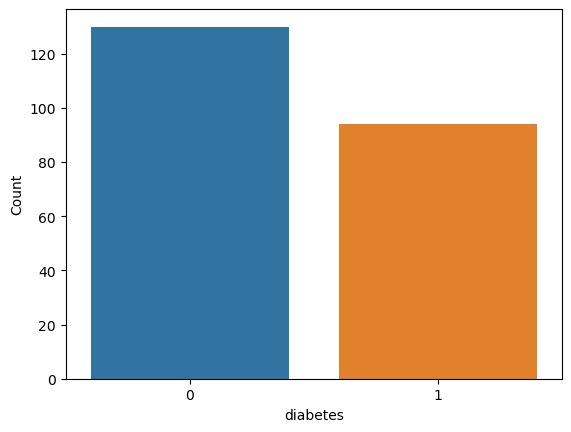

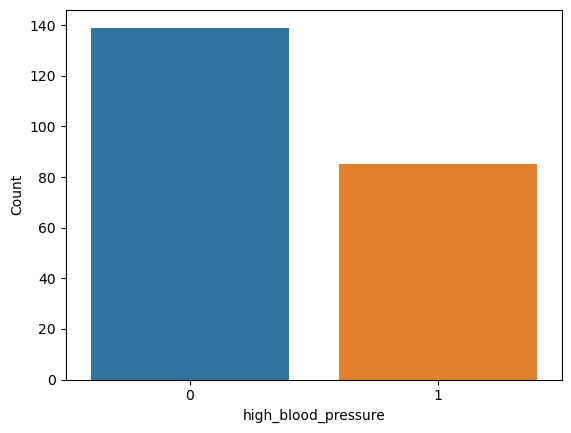

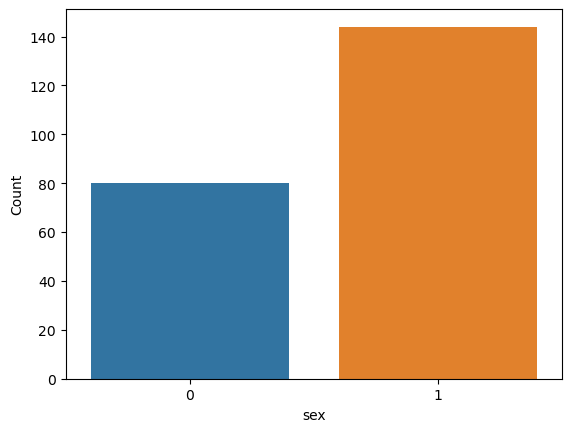

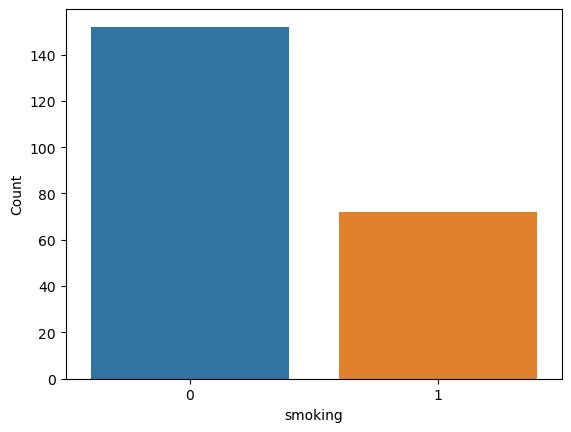

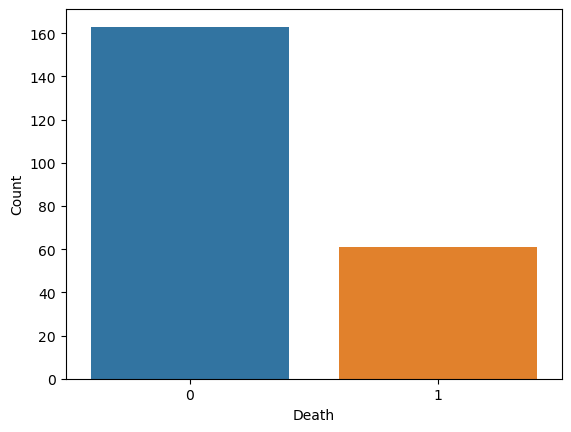

In [29]:
for j in Data[['anaemia','diabetes','high_blood_pressure','sex','smoking','Death']]:
    sns.countplot(Data[j])
    plt.xlabel(j)
    plt.ylabel('Count')
    plt.show()

In [30]:
Data['Death'].value_counts()

0    163
1     61
Name: Death, dtype: int64

In [31]:
X=Data.drop(['Death'],axis=1)
X

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
5    90.0        1                        47         0                 40   
6    75.0        1                       246         0                 15   
..    ...      ...                       ...       ...                ...   
291  60.0        0                       320         0                 35   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1   265000.0               1.9           130    1   
2                      0   162000.0               1.3           129    1   
3                      0   210000.0               1.9           137    1   
5                      1   204000.0               2.1           132    1   
6                      0   127000.0               1.2           137    1   
..                   ...        ...               ...           ...  ...   
291                    0   133000.0               1.4           139    1   
292                    0   382000.0               1.0           140    1   
293                    0   179000.0               0.9           136    1   
294                    1   155000.0               1.1           143    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  
0          0     4  
2          1     7  
3          0     7  
5          1     8  
6          0    10  
..       ...   ...  
291        0   258  
292        1   258  
293        1   270  
294        1   270  
298        1   285  

[224 rows x 12 columns]

In [32]:
Y=Data['Death']
Y

0      1
2      1
3      1
5      1
6      1
      ..
291    0
292    0
293    0
294    0
298    0
Name: Death, Length: 224, dtype: int64

# Class Balancing :

In [33]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [34]:
from imblearn.over_sampling import SMOTEN
sm=SMOTEN()
x_res,y_res=sm.fit_resample(X,Y)

<AxesSubplot:xlabel='Death', ylabel='count'>

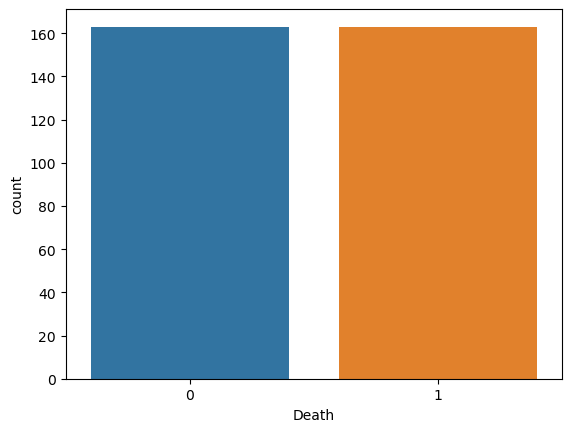

In [35]:
sns.countplot(y_res)

# Feature Scaling :

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_sc=ss.fit_transform(x_res)

# Train_test_split :

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y_res,train_size=0.8,random_state=32)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((260, 12), (66, 12), (260,), (66,))

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

# LogisticRegression :

In [39]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [40]:
Y_Pre=Lr.predict(x_test)

In [41]:
Lr.score(x_test,y_test)

0.9545454545454546

In [42]:
Lr.score(x_train,y_train)

0.8807692307692307

In [43]:
cm=confusion_matrix(y_test,Y_Pre)
cm

array([[25,  0],
       [ 3, 38]], dtype=int64)

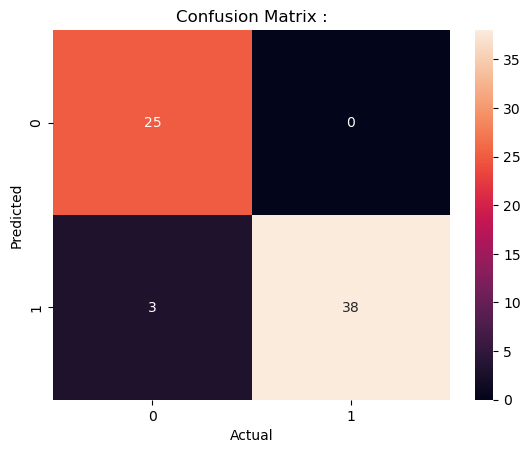

In [44]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [45]:
AS=accuracy_score(y_test,Y_Pre)
print('The accuracy score is = '+str(AS))

The accuracy score is = 0.9545454545454546


In [46]:
CR=classification_report(y_test,Y_Pre)
print(CR)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.93      0.96        41

    accuracy                           0.95        66
   macro avg       0.95      0.96      0.95        66
weighted avg       0.96      0.95      0.95        66



In [47]:
lr=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre})
lr

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [48]:
WP=len(lr.loc[lr['Actual']!=lr['Predicted']])
print('Number of wrong predictions are = '+str(WP))

Number of wrong predictions are = 3


# DecisionTreeClassifier :

In [49]:
from sklearn.tree import DecisionTreeClassifier
Dtc=DecisionTreeClassifier(random_state=5)
Dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [50]:
Y_Pre_Dtc=Dtc.predict(x_test)

In [51]:
Dtc.score(x_test,y_test)

0.8939393939393939

In [52]:
Dtc.score(x_train,y_train)

1.0

In [53]:
cm1=confusion_matrix(y_test,Y_Pre_Dtc)
cm1

array([[24,  1],
       [ 6, 35]], dtype=int64)

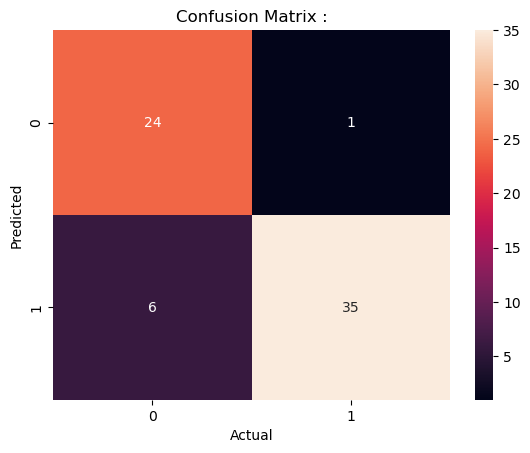

In [54]:
sns.heatmap(cm1,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [55]:
AS1=accuracy_score(y_test,Y_Pre_Dtc)
print('The accuracy score is = '+str(AS1))

The accuracy score is = 0.8939393939393939


In [56]:
CR1=classification_report(y_test,Y_Pre_Dtc)
print(CR1)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.97      0.85      0.91        41

    accuracy                           0.89        66
   macro avg       0.89      0.91      0.89        66
weighted avg       0.91      0.89      0.90        66



In [57]:
dt=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Dtc})
dt

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          0
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [58]:
WP1=len(dt.loc[dt['Actual']!=dt['Predicted']])
print('Number of wrong predictions are = '+str(WP1))

Number of wrong predictions are = 7


# RandomForestClassifier :

In [59]:
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier(random_state=5)
Rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

In [60]:
Y_Pre_Rfc=Rfc.predict(x_test)

In [61]:
Rfc.score(x_test,y_test)

0.9696969696969697

In [62]:
Rfc.score(x_train,y_train)

1.0

In [63]:
cm2=confusion_matrix(y_test,Y_Pre_Rfc)
cm2

array([[25,  0],
       [ 2, 39]], dtype=int64)

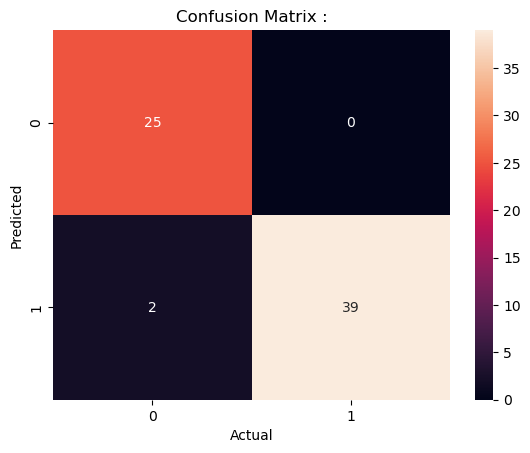

In [64]:
sns.heatmap(cm2,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [65]:
AS2=accuracy_score(y_test,Y_Pre_Rfc)
print('The accuracy score is = '+str(AS2))

The accuracy score is = 0.9696969696969697


In [66]:
CR2=classification_report(y_test,Y_Pre_Rfc)
print(CR2)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.95      0.97        41

    accuracy                           0.97        66
   macro avg       0.96      0.98      0.97        66
weighted avg       0.97      0.97      0.97        66



In [67]:
rf=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Rfc})
rf

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [68]:
WP2=len(rf.loc[rf['Actual']!=rf['Predicted']])
print('Number of wrong predictions are = '+str(WP2))

Number of wrong predictions are = 2


# SVM :

## RBF :

In [69]:
from sklearn.svm import SVC
Rbf=SVC(random_state=0)
Rbf.fit(x_train,y_train)

SVC(random_state=0)

In [70]:
Y_Pre_Rbf=Rbf.predict(x_test)

In [71]:
Rbf.score(x_test,y_test)

0.8787878787878788

In [72]:
Rbf.score(x_train,y_train)

0.9461538461538461

In [73]:
cm3=confusion_matrix(y_test,Y_Pre_Rbf)
cm3

array([[25,  0],
       [ 8, 33]], dtype=int64)

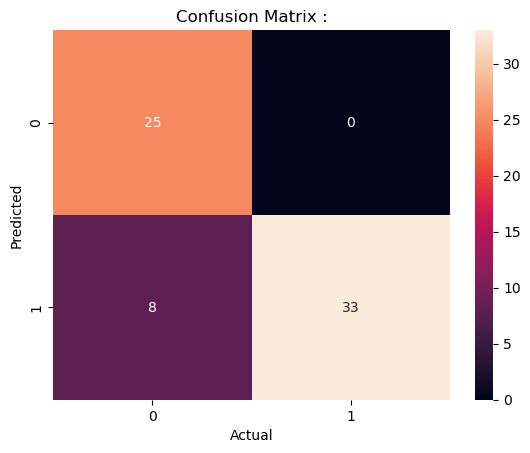

In [74]:
sns.heatmap(cm3,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [75]:
AS3=accuracy_score(y_test,Y_Pre_Rbf)
print('The accuracy score is = '+str(AS3))

The accuracy score is = 0.8787878787878788


In [76]:
CR3=classification_report(y_test,Y_Pre_Rbf)
print(CR3)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        25
           1       1.00      0.80      0.89        41

    accuracy                           0.88        66
   macro avg       0.88      0.90      0.88        66
weighted avg       0.91      0.88      0.88        66



In [77]:
rbf=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Rbf})
rbf

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [78]:
WP3=len(rbf.loc[rbf['Actual']!=rbf['Predicted']])
print('Number of wrong predictions are = '+str(WP3))

Number of wrong predictions are = 8


## Linear :

In [79]:
from sklearn.svm import SVC
Linear=SVC(kernel='linear',random_state=0)
Linear.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [80]:
Y_Pre_Linear=Linear.predict(x_test)

In [81]:
Linear.score(x_test,y_test)

0.9393939393939394

In [82]:
Linear.score(x_train,y_train)

0.8846153846153846

In [83]:
cm4=confusion_matrix(y_test,Y_Pre_Linear)
cm4

array([[25,  0],
       [ 4, 37]], dtype=int64)

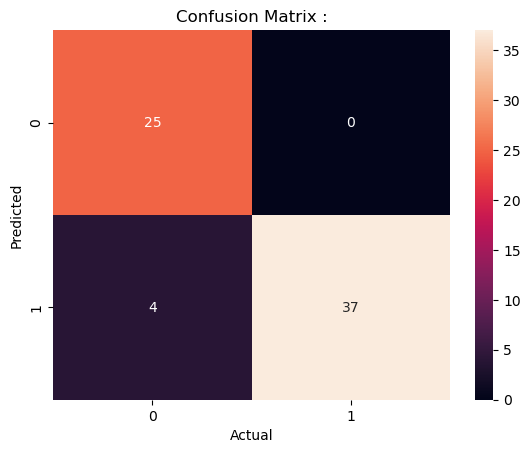

In [84]:
sns.heatmap(cm4,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [85]:
AS4=accuracy_score(y_test,Y_Pre_Linear)
print('The accuracy score is = '+str(AS4))

The accuracy score is = 0.9393939393939394


In [86]:
CR4=classification_report(y_test,Y_Pre_Linear)
print(CR4)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.90      0.95        41

    accuracy                           0.94        66
   macro avg       0.93      0.95      0.94        66
weighted avg       0.95      0.94      0.94        66



In [87]:
Linr=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Linear})
Linr

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [88]:
WP4=len(Linr.loc[Linr['Actual']!=Linr['Predicted']])
print('Number of wrong predictions are = '+str(WP4))

Number of wrong predictions are = 4


## Poly :

In [89]:
from sklearn.svm import SVC
Poly=SVC(kernel='poly',random_state=0)
Poly.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [90]:
Y_Pre_Poly=Poly.predict(x_test)

In [91]:
Poly.score(x_test,y_test)

0.9090909090909091

In [92]:
Poly.score(x_train,y_train)

0.9615384615384616

In [93]:
cm5=confusion_matrix(y_test,Y_Pre_Poly)
cm5

array([[24,  1],
       [ 5, 36]], dtype=int64)

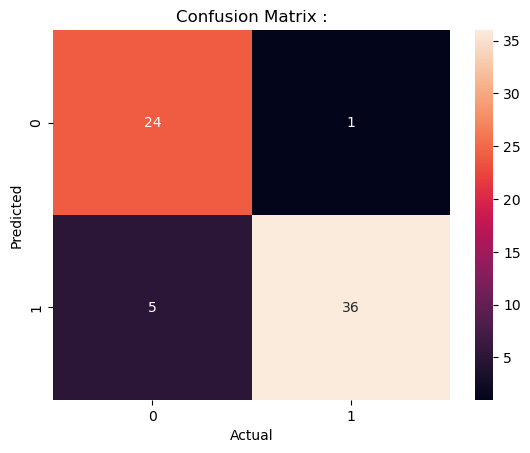

In [94]:
sns.heatmap(cm5,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [95]:
AS5=accuracy_score(y_test,Y_Pre_Poly)
print('The accuracy score is = '+str(AS5))

The accuracy score is = 0.9090909090909091


In [96]:
CR5=classification_report(y_test,Y_Pre_Poly)
print(CR5)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.97      0.88      0.92        41

    accuracy                           0.91        66
   macro avg       0.90      0.92      0.91        66
weighted avg       0.92      0.91      0.91        66



In [97]:
Pol=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Poly})
Pol

Actual  Predicted
118       0          0
60        0          1
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [98]:
WP5=len(Pol.loc[Pol['Actual']!=Pol['Predicted']])
print('Number of wrong predictions are = '+str(WP5))

Number of wrong predictions are = 6


## Sigmoid :

In [99]:
from sklearn.svm import SVC
Sigmoid=SVC(kernel='sigmoid',random_state=0)
Sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid', random_state=0)

In [100]:
Y_Pre_Sigmoid=Sigmoid.predict(x_test)

In [101]:
Sigmoid.score(x_test,y_test)

0.8939393939393939

In [102]:
Sigmoid.score(x_train,y_train)

0.8384615384615385

In [103]:
cm6=confusion_matrix(y_test,Y_Pre_Sigmoid)
cm6

array([[24,  1],
       [ 6, 35]], dtype=int64)

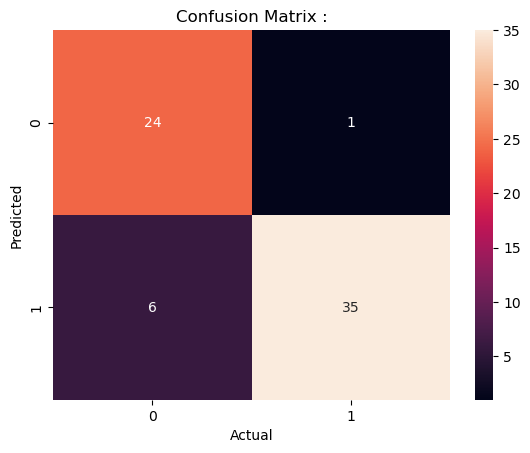

In [104]:
sns.heatmap(cm6,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [105]:
AS6=accuracy_score(y_test,Y_Pre_Sigmoid)
print('The accuracy score is = '+str(AS6))

The accuracy score is = 0.8939393939393939


In [106]:
CR6=classification_report(y_test,Y_Pre_Sigmoid)
print(CR6)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.97      0.85      0.91        41

    accuracy                           0.89        66
   macro avg       0.89      0.91      0.89        66
weighted avg       0.91      0.89      0.90        66



In [107]:
Sigmo=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Sigmoid})
Sigmo

Actual  Predicted
118       0          0
60        0          1
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [108]:
WP6=len(Sigmo.loc[Sigmo['Actual']!=Sigmo['Predicted']])
print('Number of wrong predictions are = '+str(WP6))

Number of wrong predictions are = 7


# KNeighborsClassifier (KNN) :

In [109]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [110]:
Y_Pre_Knc=Knn.predict(x_test)

In [111]:
Knn.score(x_test,y_test)

0.8333333333333334

In [112]:
Knn.score(x_train,y_train)

0.8923076923076924

In [113]:
cm7=confusion_matrix(y_test,Y_Pre_Knc)
cm7

array([[23,  2],
       [ 9, 32]], dtype=int64)

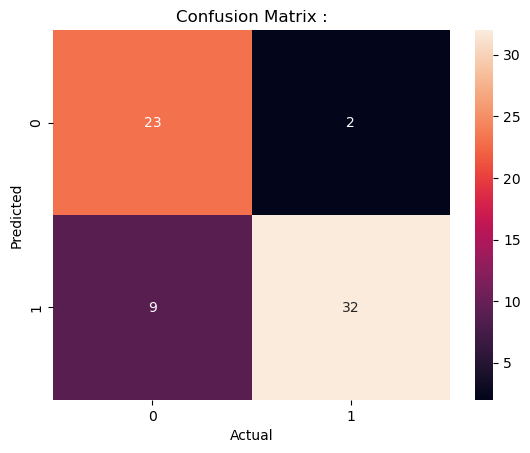

In [114]:
sns.heatmap(cm7,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [115]:
AS7=accuracy_score(y_test,Y_Pre_Knc)
print('The accuracy score is = '+str(AS7))

The accuracy score is = 0.8333333333333334


In [116]:
CR7=classification_report(y_test,Y_Pre_Knc)
print(CR7)

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       0.94      0.78      0.85        41

    accuracy                           0.83        66
   macro avg       0.83      0.85      0.83        66
weighted avg       0.86      0.83      0.84        66



In [117]:
kn=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Knc})
kn

Actual  Predicted
118       0          0
60        0          1
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [118]:
WP7=len(kn.loc[kn['Actual']!=kn['Predicted']])
print('Number of wrong predictions are = '+str(WP7))

Number of wrong predictions are = 11


# Naive Bayes (GaussianNB) :

In [119]:
from sklearn.naive_bayes import GaussianNB
Nb=GaussianNB()
Nb.fit(x_train,y_train)

GaussianNB()

In [120]:
Y_Pre_Nb=Nb.predict(x_test)

In [121]:
Nb.score(x_test,y_test)

0.9090909090909091

In [122]:
Nb.score(x_train,y_train)

0.8615384615384616

In [123]:
cm8=confusion_matrix(y_test,Y_Pre_Nb)
cm8

array([[24,  1],
       [ 5, 36]], dtype=int64)

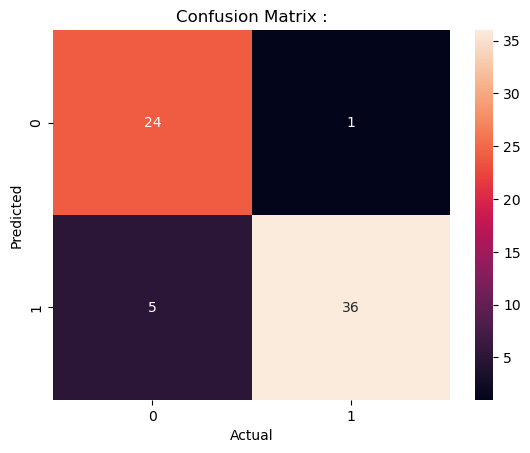

In [124]:
sns.heatmap(cm8,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [125]:
AS8=accuracy_score(y_test,Y_Pre_Nb)
print('The accuracy score is = '+str(AS8))

The accuracy score is = 0.9090909090909091


In [126]:
CR8=classification_report(y_test,Y_Pre_Nb)
print(CR8)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.97      0.88      0.92        41

    accuracy                           0.91        66
   macro avg       0.90      0.92      0.91        66
weighted avg       0.92      0.91      0.91        66



In [127]:
nb=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Nb})
nb

Actual  Predicted
118       0          0
60        0          1
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [128]:
WP8=len(nb.loc[nb['Actual']!=nb['Predicted']])
print('Number of wrong predictions are = '+str(WP8))

Number of wrong predictions are = 6


# Ensemble Learning :
## VotingClassifier :

In [129]:
from sklearn.ensemble import VotingClassifier
Vc=VotingClassifier(estimators=(('rfc',Rfc),('lr',Lr),('dc',Dtc)))
Vc.fit(x_train,y_train)

VotingClassifier(estimators=(('rfc', RandomForestClassifier(random_state=5)),
                             ('lr', LogisticRegression()),
                             ('dc', DecisionTreeClassifier(random_state=5))))

In [130]:
Y_Pre_Vc=Vc.predict(x_test)

In [131]:
Vc.score(x_test,y_test)

0.9545454545454546

In [132]:
Vc.score(x_train,y_train)

1.0

In [133]:
cm9=confusion_matrix(y_test,Y_Pre_Vc)
cm9

array([[25,  0],
       [ 3, 38]], dtype=int64)

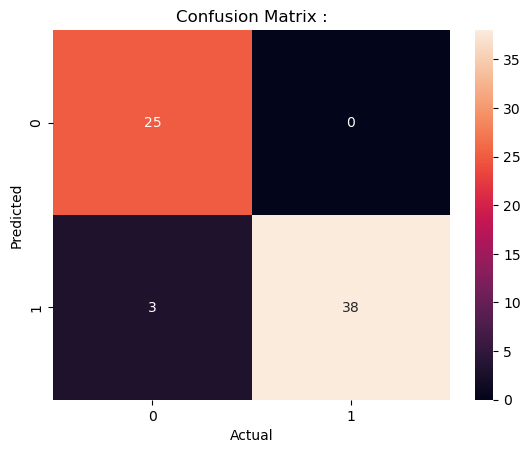

In [134]:
sns.heatmap(cm9,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [135]:
AS9=accuracy_score(y_test,Y_Pre_Vc)
print('The accuracy score is = '+str(AS9))

The accuracy score is = 0.9545454545454546


In [136]:
CR9=classification_report(y_test,Y_Pre_Vc)
print(CR9)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.93      0.96        41

    accuracy                           0.95        66
   macro avg       0.95      0.96      0.95        66
weighted avg       0.96      0.95      0.95        66



In [137]:
vc=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Vc})
vc

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [138]:
WP9=len(vc.loc[vc['Actual']!=vc['Predicted']])
print('Number of wrong predictions are = '+str(WP9))

Number of wrong predictions are = 3


## BaggingClassifier :

In [139]:
from sklearn.ensemble import BaggingClassifier
Bc=BaggingClassifier(base_estimator=Rfc)
Bc.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=5))

In [140]:
Y_Pre_Bc=Bc.predict(x_test)

In [141]:
Bc.score(x_test,y_test)

0.9696969696969697

In [142]:
Bc.score(x_train,y_train)

0.9807692307692307

In [143]:
cm10=confusion_matrix(y_test,Y_Pre_Bc)
cm10

array([[25,  0],
       [ 2, 39]], dtype=int64)

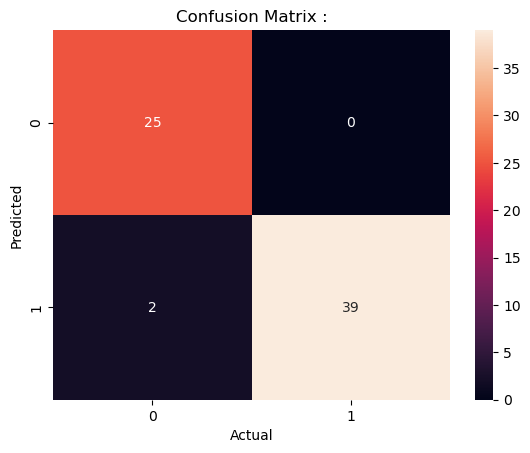

In [144]:
sns.heatmap(cm10,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [145]:
AS10=accuracy_score(y_test,Y_Pre_Bc)
print('The accuracy score is = '+str(AS10))

The accuracy score is = 0.9696969696969697


In [146]:
CR10=classification_report(y_test,Y_Pre_Bc)
print(CR10)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.95      0.97        41

    accuracy                           0.97        66
   macro avg       0.96      0.98      0.97        66
weighted avg       0.97      0.97      0.97        66



In [147]:
bc=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Bc})
bc

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [148]:
WP10=len(bc.loc[bc['Actual']!=bc['Predicted']])
print('Number of wrong predictions are = '+str(WP10))

Number of wrong predictions are = 2


# Boosting Process :
## AdaBoostClassifier :

In [149]:
from sklearn.ensemble import AdaBoostClassifier
Abc=AdaBoostClassifier(base_estimator=Rfc)
Abc.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=5))

In [150]:
Y_Pre_Abc=Abc.predict(x_test)

In [151]:
Abc.score(x_test,y_test)

0.9696969696969697

In [152]:
Abc.score(x_train,y_train)

1.0

In [153]:
cm11=confusion_matrix(y_test,Y_Pre_Abc)
cm11

array([[25,  0],
       [ 2, 39]], dtype=int64)

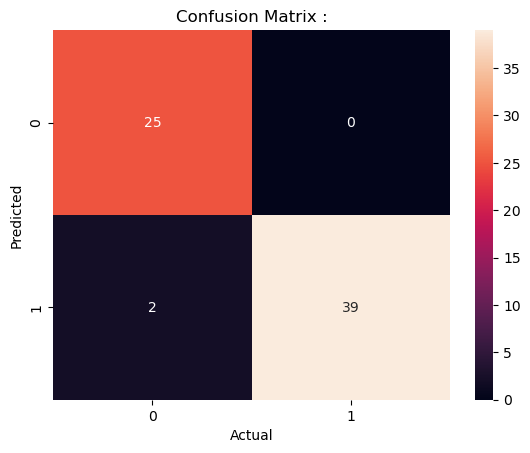

In [154]:
sns.heatmap(cm11,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [155]:
AS11=accuracy_score(y_test,Y_Pre_Abc)
print('The accuracy score is = '+str(AS11))

The accuracy score is = 0.9696969696969697


In [156]:
CR11=classification_report(y_test,Y_Pre_Abc)
print(CR11)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.95      0.97        41

    accuracy                           0.97        66
   macro avg       0.96      0.98      0.97        66
weighted avg       0.97      0.97      0.97        66



In [157]:
ab=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Abc})
ab

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [158]:
WP11=len(ab.loc[ab['Actual']!=ab['Predicted']])
print('Number of wrong predictions are = '+str(WP11))

Number of wrong predictions are = 2


## GradientBoostingClassifier :

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
Gbc=GradientBoostingClassifier()
Gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [160]:
Y_Pre_Gbc=Gbc.predict(x_test)

In [161]:
Gbc.score(x_test,y_test)

0.9242424242424242

In [162]:
Gbc.score(x_train,y_train)

1.0

In [163]:
cm12=confusion_matrix(y_test,Y_Pre_Gbc)
cm12

array([[25,  0],
       [ 5, 36]], dtype=int64)

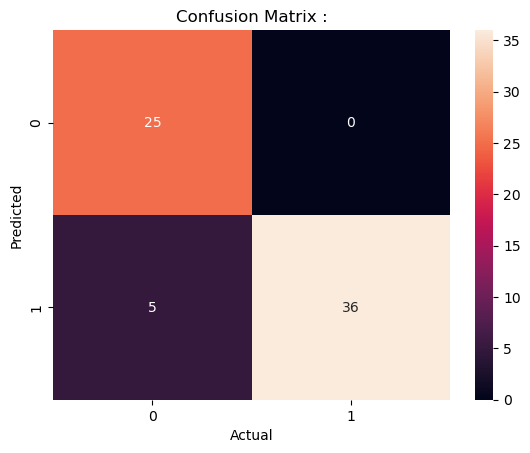

In [164]:
sns.heatmap(cm12,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [165]:
AS12=accuracy_score(y_test,Y_Pre_Gbc)
print('The accuracy score is = '+str(AS12))

The accuracy score is = 0.9242424242424242


In [166]:
CR12=classification_report(y_test,Y_Pre_Gbc)
print(CR12)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       1.00      0.88      0.94        41

    accuracy                           0.92        66
   macro avg       0.92      0.94      0.92        66
weighted avg       0.94      0.92      0.93        66



In [167]:
gb=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Gbc})
gb

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [168]:
WP12=len(gb.loc[gb['Actual']!=gb['Predicted']])
print('Number of wrong predictions are = '+str(WP12))

Number of wrong predictions are = 5


## XGBClassifier :

In [169]:
!pip install XGBoost 

Defaulting to user installation because normal site-packages is not writeable


In [170]:
from xgboost import XGBClassifier
Xgbc=XGBClassifier()
Xgbc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [171]:
Y_Pre_Xgbc=Xgbc.predict(x_test)

In [172]:
Xgbc.score(x_test,y_test)

0.9393939393939394

In [173]:
Xgbc.score(x_train,y_train)

1.0

In [174]:
cm13=confusion_matrix(y_test,Y_Pre_Xgbc)
cm13

array([[25,  0],
       [ 4, 37]], dtype=int64)

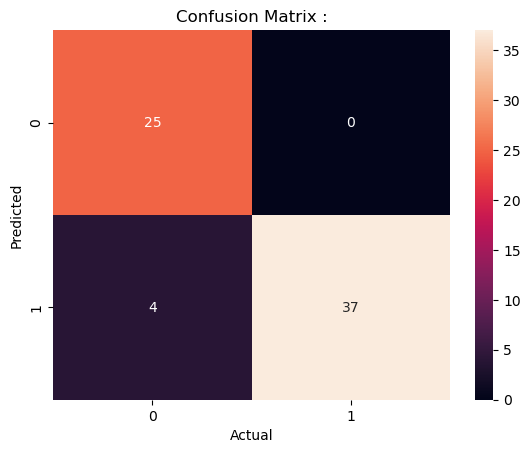

In [175]:
sns.heatmap(cm13,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix :')
plt.show()

In [176]:
AS13=accuracy_score(y_test,Y_Pre_Xgbc)
print('The accuracy score is = '+str(AS13))

The accuracy score is = 0.9393939393939394


In [177]:
CR13=classification_report(y_test,Y_Pre_Xgbc)
print(CR13)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.90      0.95        41

    accuracy                           0.94        66
   macro avg       0.93      0.95      0.94        66
weighted avg       0.95      0.94      0.94        66



In [178]:
xgb=pd.DataFrame({'Actual':y_test,'Predicted':Y_Pre_Xgbc})
xgb

Actual  Predicted
118       0          0
60        0          0
72        0          0
295       1          1
294       1          1
..      ...        ...
233       1          1
291       1          1
149       0          0
309       1          1
177       0          0

[66 rows x 2 columns]

In [179]:
WP13=len(xgb.loc[xgb['Actual']!=xgb['Predicted']])
print('Number of wrong predictions are = '+str(WP13))

Number of wrong predictions are = 4


# ROC Curve :

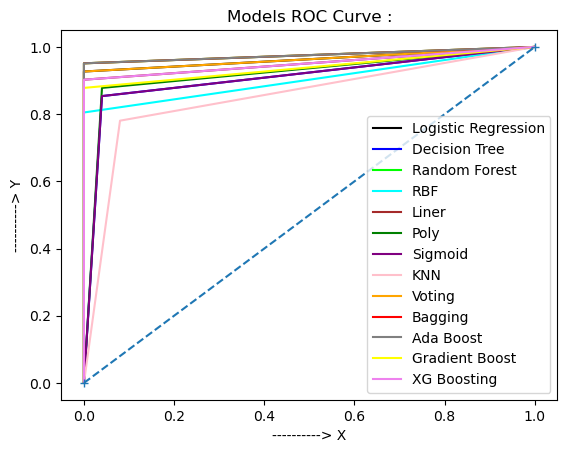

In [180]:
t_log,f_log,th_log=roc_curve(y_test,Y_Pre)
t_dt1,f_dt1,th_dt1=roc_curve(y_test,Y_Pre_Dtc)
t_ran1,f_ran1,th_ran1=roc_curve(y_test,Y_Pre_Rfc)
t_Sc1,f_Sc1,th_Sc1=roc_curve(y_test,Y_Pre_Rbf)
t_Sc2,f_Sc2,th_Sc2=roc_curve(y_test,Y_Pre_Linear)
t_Sc3,f_Sc3,th_Sc3=roc_curve(y_test,Y_Pre_Poly)
t_Sc4,f_Sc4,th_Sc4=roc_curve(y_test,Y_Pre_Sigmoid)
t_knn,f_knn,th_knn=roc_curve(y_test,Y_Pre_Knc)
t_v,f_v,th_v=roc_curve(y_test,Y_Pre_Vc)
t_bag,f_bag,th_bag=roc_curve(y_test,Y_Pre_Bc)
t_ab,f_ab,th_ab=roc_curve(y_test,Y_Pre_Abc)
t_gb,f_gb,th_gb=roc_curve(y_test,Y_Pre_Gbc)
t_xg,f_xg,th_xg=roc_curve(y_test,Y_Pre_Xgbc)
plt.plot(t_log,f_log,color='black',label='Logistic Regression')
plt.plot(t_dt1,f_dt1,color='blue',label='Decision Tree')
plt.plot(t_ran1,f_ran1,color='lime',label='Random Forest')
plt.plot(t_Sc1,f_Sc1,color='cyan',label='RBF')
plt.plot(t_Sc2,f_Sc2,color='brown',label='Liner')
plt.plot(t_Sc3,f_Sc3,color='green',label='Poly')
plt.plot(t_Sc4,f_Sc4,color='purple',label='Sigmoid')
plt.plot(t_knn,f_knn,color='pink',label='KNN')
plt.plot(t_v,f_v,color='orange',label='Voting')
plt.plot(t_bag,f_bag,color='red',label='Bagging')
plt.plot(t_ab,f_ab,color='gray',label='Ada Boost')
plt.plot(t_gb,f_gb,color='yellow',label='Gradient Boost')
plt.plot(t_xg,f_xg,color='violet',label='XG Boosting')
plt.plot([0,1],'--',marker='+')
plt.xlabel('----------> X')
plt.ylabel('----------> Y')
plt.title('Models ROC Curve :')
plt.legend()
plt.show()

# Artificial Nural Network (ANN) :

In [440]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_accuracy',
                       min_delta=0.0001,
                       patience=20,restore_best_weights=True)

In [491]:
M=keras.Sequential()
M.add(Dense(50,input_dim=12,activation='relu'))
M.add(Dense(50,activation='softmax'))
M.add(Dense(50,activation='relu'))
M.add(Dense(1,activation='sigmoid'))
M.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
h=M.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
9/9 [==============================] - 1s 46ms/step - loss: 0.6915 - accuracy: 0.5731 - val_loss: 0.6919 - val_accuracy: 0.3788
Epoch 2/25
9/9 [==============================] - 0s 14ms/step - loss: 0.6871 - accuracy: 0.5308 - val_loss: 0.6926 - val_accuracy: 0.3788
Epoch 3/25
9/9 [==============================] - 0s 13ms/step - loss: 0.6824 - accuracy: 0.5308 - val_loss: 0.6881 - val_accuracy: 0.3788
Epoch 4/25
9/9 [==============================] - 0s 14ms/step - loss: 0.6766 - accuracy: 0.5308 - val_loss: 0.6828 - val_accuracy: 0.4091
Epoch 5/25
9/9 [==============================] - 0s 14ms/step - loss: 0.6680 - accuracy: 0.5731 - val_loss: 0.6717 - val_accuracy: 0.4848
Epoch 6/25
9/9 [==============================] - 0s 14ms/step - loss: 0.6559 - accuracy: 0.7423 - val_loss: 0.6547 - val_accuracy: 0.7727
Epoch 7/25
9/9 [==============================] - 0s 11ms/step - loss: 0.6388 - accuracy: 0.8231 - val_loss: 0.6340 - val_accuracy: 0.7879
Epoch 8/25
9/9 [===========

In [492]:
M.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.2078 - accuracy: 0.9242


[0.20778079330921173, 0.9242424368858337]

In [493]:
y_pre_ann=M.predict(x_test)

3/3 [==============================] - 0s 2ms/step


# Loss Comparison Between Training & Testing Data :

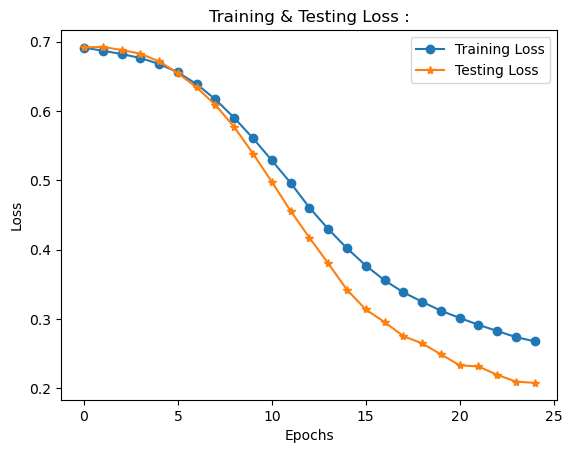

In [494]:
a1=h.history
p=pd.DataFrame(a1)
p['epoch']=h.epoch
plt.plot(p['epoch'],p['loss'],label='Training Loss',marker='o')
plt.plot(p['epoch'],p['val_loss'],label='Testing Loss',marker='*')
plt.title('Training & Testing Loss :')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Comparison Between Training & Testing Data :

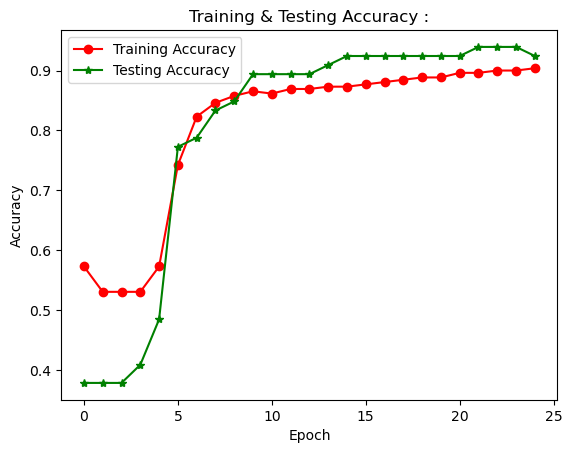

In [495]:
plt.plot(p['epoch'],p['accuracy'],label='Training Accuracy',marker='o',color='red')
plt.plot(p['epoch'],p['val_accuracy'],label='Testing Accuracy',marker='*',color='green')
plt.title('Training & Testing Accuracy :')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# All Model Accuracy :

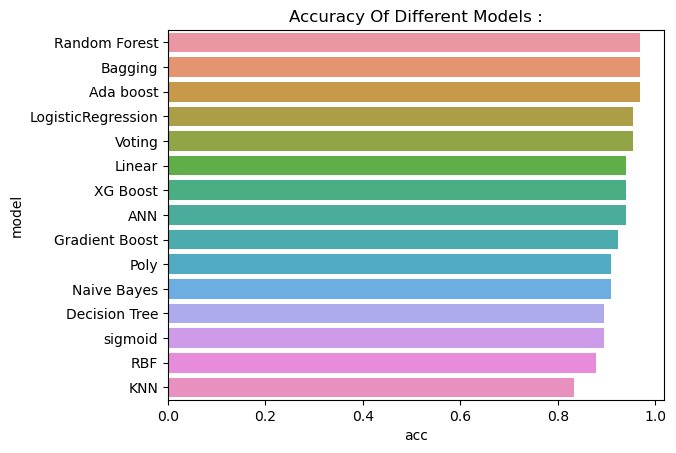

In [496]:
MA=pd.DataFrame({'acc':[Lr.score(x_test,y_test),Rfc.score(x_test,y_test),Dtc.score(x_test,y_test),Rbf.score(x_test,y_test),
                          Linear.score(x_test,y_test),Poly.score(x_test,y_test),Sigmoid.score(x_test,y_test),Knn.score(x_test,y_test),
                          Nb.score(x_test,y_test),Vc.score(x_test,y_test),Bc.score(x_test,y_test),Abc.score(x_test,y_test),
                          Gbc.score(x_test,y_test),Xgbc.score(x_test,y_test),p['val_accuracy'].max()],
                          'model':['LogisticRegression','Random Forest','Decision Tree','RBF','Linear','Poly','sigmoid',
                                  'KNN','Naive Bayes','Voting','Bagging','Ada boost','Gradient Boost','XG Boost','ANN']})
MA.sort_values('acc',ascending=False,inplace=True)
sns.barplot(MA['acc'],MA['model'])
plt.title('Accuracy Of Different Models :')
plt.show()

## Models Accuracy :

In [500]:
print('Accuracy Of All Model :')
print('Logistic Regression = '+str(AS))
print('Decision Tree = '+str(AS1))
print('Random Forest = '+str(AS2))
print('RFB = '+str(AS3))
print('Linear = '+str(AS4))
print('Poly = '+str(AS5))
print('Sigmoid = '+str(AS6))
print('KNN = '+str(AS7))
print('Naive Bayes = '+str(AS8))
print('Voting = '+str(AS9))
print('Bagging = '+str(AS10))
print('Ada Boost = '+str(AS11))
print('Gradient Boost = '+str(AS12))
print('XG Boost = '+str(AS13))

Accuracy Of All Model :
Logistic Regression = 0.9545454545454546
Decision Tree = 0.8939393939393939
Random Forest = 0.9696969696969697
RFB = 0.8787878787878788
Linear = 0.9393939393939394
Poly = 0.9090909090909091
Sigmoid = 0.8939393939393939
KNN = 0.8333333333333334
Naive Bayes = 0.9090909090909091
Voting = 0.9545454545454546
Bagging = 0.9696969696969697
Ada Boost = 0.9696969696969697
Gradient Boost = 0.9242424242424242
XG Boost = 0.9393939393939394


# All Model Wrong Prediction :

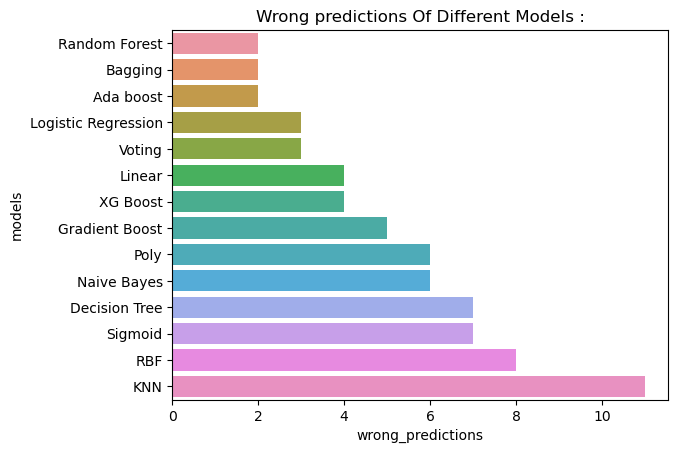

In [497]:
MW=pd.DataFrame({'models':['Logistic Regression','Random Forest','Decision Tree','RBF','Linear','Poly','Sigmoid',
                                  'KNN','Naive Bayes','Voting','Bagging','Ada boost','Gradient Boost','XG Boost'],
                  'wrong_predictions':[WP,WP2,WP1,WP3,WP4,WP5,WP6,WP7,WP8,WP9,WP10,WP11,WP12,WP13]})
MW.sort_values('wrong_predictions',inplace=True)
sns.barplot(MW['wrong_predictions'],MW['models'])
plt.title('Wrong predictions Of Different Models :')
plt.show()

## Models Wrong Prediction :

In [499]:
print('Wrong Prediction Of All Model :')
print('Logistic Regression = '+str(WP))
print('Decision Tree = '+str(WP1))
print('Random Forest = '+str(WP2))
print('RFB = '+str(WP3))
print('Linear = '+str(WP4))
print('Poly = '+str(WP5))
print('Sigmoid = '+str(WP6))
print('KNN = '+str(WP7))
print('Naive Bayes = '+str(WP8))
print('Voting = '+str(WP9))
print('Bagging = '+str(WP10))
print('Ada Boost = '+str(WP11))
print('Gradient Boost = '+str(WP12))
print('XG Boost = '+str(WP13))

Wrong Prediction Of All Model :
Logistic Regression = 3
Decision Tree = 7
Random Forest = 2
RFB = 8
Linear = 4
Poly = 6
Sigmoid = 7
KNN = 11
Naive Bayes = 6
Voting = 3
Bagging = 2
Ada Boost = 2
Gradient Boost = 5
XG Boost = 4
